In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('ufcdata/data.csv')
df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


In [3]:
df.isnull().sum().sort_values(ascending = False)

B_avg_opp_DISTANCE_att          1265
B_avg_TD_pct                    1265
B_avg_opp_TD_att                1265
B_avg_opp_TD_landed             1265
B_avg_opp_TOTAL_STR_att         1265
B_avg_opp_TOTAL_STR_landed      1265
B_avg_opp_CLINCH_att            1265
B_total_time_fought(seconds)    1265
B_avg_opp_BODY_landed           1265
B_avg_opp_BODY_att              1265
B_avg_TOTAL_STR_landed          1265
B_avg_TOTAL_STR_att             1265
B_avg_TD_landed                 1265
B_avg_opp_SIG_STR_pct           1265
B_avg_LEG_att                   1265
B_avg_LEG_landed                1265
B_avg_TD_att                    1265
B_avg_SUB_ATT                   1265
B_avg_SIG_STR_pct               1265
B_avg_SIG_STR_landed            1265
B_avg_SIG_STR_att               1265
B_avg_REV                       1265
B_avg_PASS                      1265
B_avg_opp_CLINCH_landed         1265
B_avg_opp_SUB_ATT               1265
B_avg_opp_TD_pct                1265
B_avg_opp_SIG_STR_landed        1265
B

In [4]:
df.dropna(inplace = True)

In [5]:
df.isnull().sum().sort_values(ascending = False)

R_age                           0
B_wins                          0
B_avg_opp_PASS                  0
B_avg_opp_LEG_landed            0
B_avg_opp_LEG_att               0
B_avg_opp_KD                    0
B_avg_opp_HEAD_landed           0
B_avg_opp_HEAD_att              0
B_avg_opp_GROUND_landed         0
B_avg_opp_GROUND_att            0
B_avg_opp_DISTANCE_landed       0
B_avg_opp_DISTANCE_att          0
B_avg_opp_CLINCH_landed         0
B_avg_opp_CLINCH_att            0
B_avg_opp_BODY_landed           0
B_avg_opp_BODY_att              0
B_losses                        0
B_avg_opp_REV                   0
B_avg_opp_SIG_STR_att           0
B_avg_opp_SIG_STR_landed        0
B_total_time_fought(seconds)    0
B_win_by_Submission             0
B_win_by_KO/TKO                 0
B_win_by_Decision_Unanimous     0
B_win_by_Decision_Split         0
B_win_by_Decision_Majority      0
B_total_title_bouts             0
B_total_rounds_fought           0
B_avg_opp_SIG_STR_pct           0
B_avg_opp_TOTA

In [6]:
df2 = pd.read_csv('ufcdata/raw_fighter_details.csv')
df2.head()

,fighter_name,Height,Weight,Reach,Stance,DOB
0,AJ Fonseca,"5' 4""",145 lbs.,NaN,NaN,NaN
1,AJ Matthews,"5' 11""",185 lbs.,NaN,NaN,NaN
2,AJ McKee,"5' 10""",145 lbs.,NaN,NaN,NaN
3,AJ Siscoe,"5' 7""",135 lbs.,NaN,NaN,NaN
4,Aalon Cruz,"6' 0""",145 lbs.,NaN,NaN,NaN


In [27]:
df2.isnull().sum().sort_values(ascending = False)

Reach           1744
Stance           874
DOB              740
Height           263
Weight            75
fighter_name       0
dtype: int64

In [28]:
df2.isnull().mean().sort_values(ascending = False)

Reach           0.526411
Stance          0.263809
DOB             0.223363
Height          0.079384
Weight          0.022638
fighter_name    0.000000
dtype: float64

In [7]:
df3 = pd.read_csv('ufcdata/raw_total_fight_data.csv', sep = ';')
df3.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,...,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52%,47%,99 of 182,59 of 121,...,1 of 1,KO/TKO,3,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","Chicago, Illinois, USA",UFC Bantamweight Title Bout,Henry Cejudo
1,Valentina Shevchenko,Jessica Eye,1,0,8 of 11,2 of 12,72%,16%,37 of 40,42 of 52,...,0 of 0,KO/TKO,2,0:26,5 Rnd (5-5-5-5-5),Robert Madrigal,"June 08, 2019","Chicago, Illinois, USA",UFC Women's Flyweight Title Bout,Valentina Shevchenko
2,Tony Ferguson,Donald Cerrone,0,0,104 of 200,68 of 185,52%,36%,104 of 200,68 of 185,...,0 of 0,TKO - Doctor's Stoppage,2,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Lightweight Bout,Tony Ferguson
3,Jimmie Rivera,Petr Yan,0,2,73 of 192,56 of 189,38%,29%,76 of 195,58 of 192,...,4 of 10,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Kevin MacDonald,"June 08, 2019","Chicago, Illinois, USA",Bantamweight Bout,Petr Yan
4,Tai Tuivasa,Blagoy Ivanov,0,1,64 of 144,73 of 123,44%,59%,66 of 146,81 of 131,...,6 of 6,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Heavyweight Bout,Blagoy Ivanov


In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Data columns (total 41 columns):
R_fighter          5144 non-null object
B_fighter          5144 non-null object
R_KD               5144 non-null int64
B_KD               5144 non-null int64
R_SIG_STR.         5144 non-null object
B_SIG_STR.         5144 non-null object
R_SIG_STR_pct      5144 non-null object
B_SIG_STR_pct      5144 non-null object
R_TOTAL_STR.       5144 non-null object
B_TOTAL_STR.       5144 non-null object
R_TD               5144 non-null object
B_TD               5144 non-null object
R_TD_pct           5144 non-null object
B_TD_pct           5144 non-null object
R_SUB_ATT          5144 non-null int64
B_SUB_ATT          5144 non-null int64
R_PASS             5144 non-null int64
B_PASS             5144 non-null int64
R_REV              5144 non-null int64
B_REV              5144 non-null int64
R_HEAD             5144 non-null object
B_HEAD             5144 non-null object
R_BODY             51

In [24]:
df3.isnull().sum().sort_values(ascending = False)

Winner             83
Referee            23
B_TOTAL_STR.        0
B_PASS              0
R_PASS              0
B_SUB_ATT           0
R_SUB_ATT           0
B_TD_pct            0
R_TD_pct            0
B_TD                0
R_TD                0
R_TOTAL_STR.        0
B_REV               0
B_SIG_STR_pct       0
R_SIG_STR_pct       0
B_SIG_STR.          0
R_SIG_STR.          0
B_KD                0
R_KD                0
B_fighter           0
R_REV               0
R_HEAD              0
Fight_type          0
R_GROUND            0
location            0
date                0
Format              0
last_round_time     0
last_round          0
win_by              0
B_GROUND            0
B_CLINCH            0
B_HEAD              0
R_CLINCH            0
B_DISTANCE          0
R_DISTANCE          0
B_LEG               0
R_LEG               0
B_BODY              0
R_BODY              0
R_fighter           0
dtype: int64

In [9]:
df_blue = df[df.Winner == 'Blue']
df_blue.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0
7,Karolina Kowalkiewicz,Alexa Grasso,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Women's Strawweight,3,1.0,...,0.0,0.0,0.0,5.0,Orthodox,160.02,162.56,115.0,25.0,33.0
8,Ricardo Lamas,Calvin Kattar,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Featherweight,3,0.0,...,4.0,3.0,0.0,10.0,Orthodox,172.72,180.34,145.0,31.0,37.0
10,Bevon Lewis,Darren Stewart,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Blue,False,Middleweight,3,1.0,...,0.0,0.0,0.0,0.0,Orthodox,190.50,200.66,185.0,28.0,28.0


In [10]:
df_Red = df[df.Winner == 'Red']
df_Red.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
6,Aljamain Sterling,Pedro Munhoz,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,False,Bantamweight,3,0.0,...,1.0,3.0,0.0,9.0,Orthodox,170.18,180.34,135.0,32.0,29.0
9,Yan Xiaonan,Angela Hill,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,False,Women's Strawweight,3,0.0,...,0.0,0.0,0.0,3.0,Orthodox,165.10,160.02,115.0,34.0,29.0


In [11]:
df_Red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2016 entries, 0 to 5008
Columns: 145 entries, R_fighter to R_age
dtypes: bool(1), float64(134), int64(1), object(9)
memory usage: 2.2+ MB


In [12]:
df_Red.title_bout.value_counts()

False    1852
True      164
Name: title_bout, dtype: int64

In [13]:
cols = list(df_Red.select_dtypes(exclude=['object','bool']).columns)

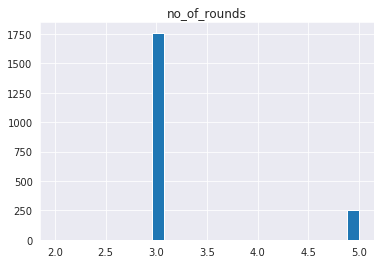

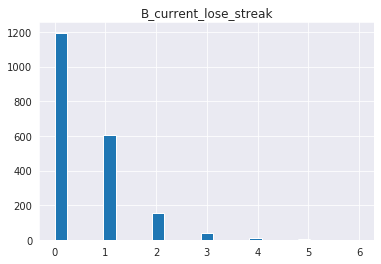

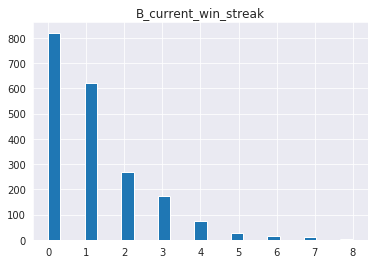

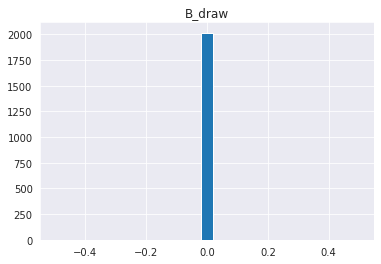

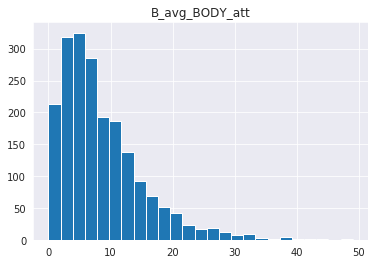

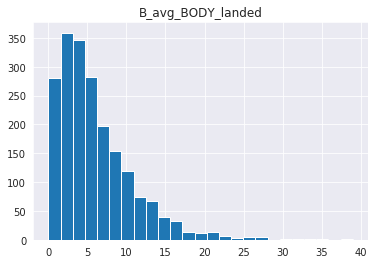

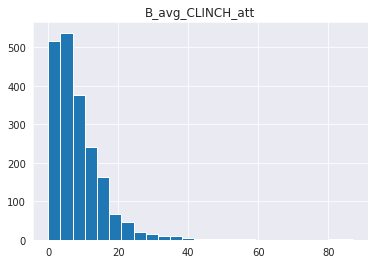

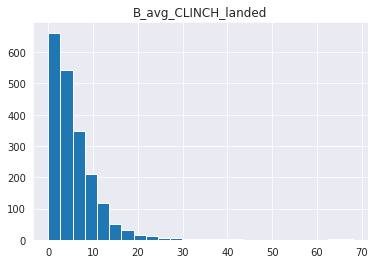

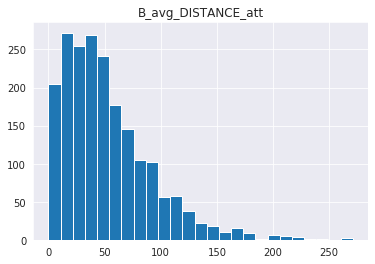

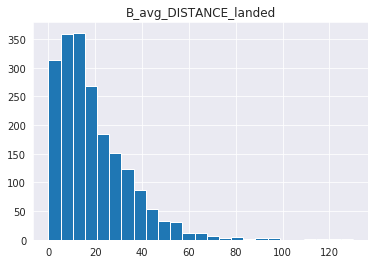

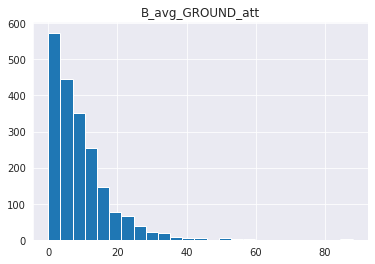

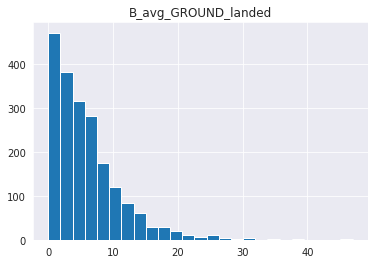

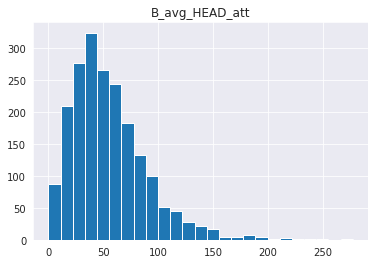

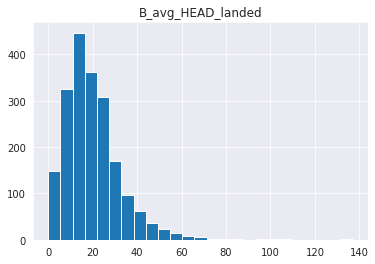

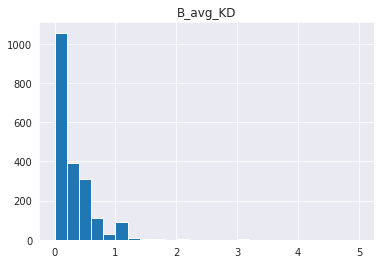

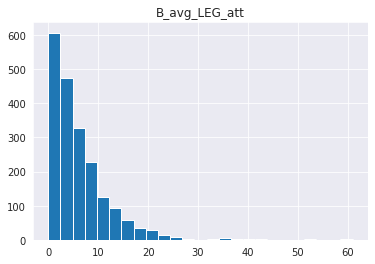

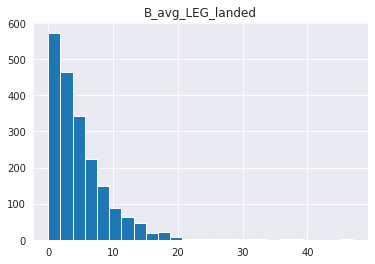

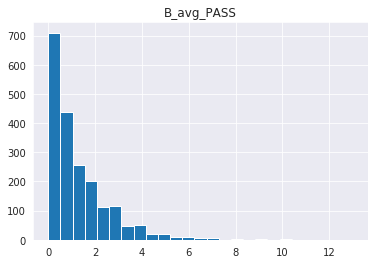

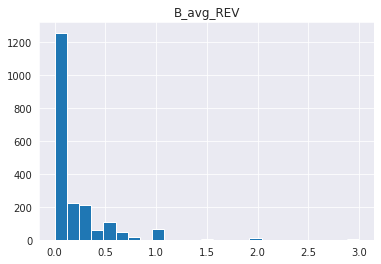

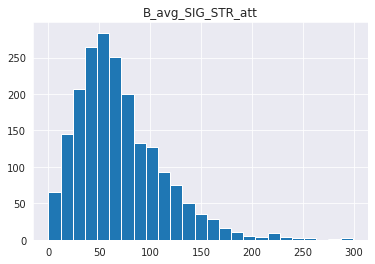

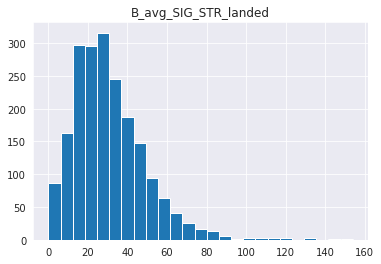

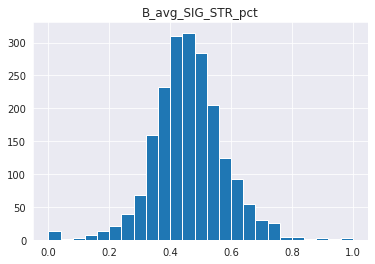

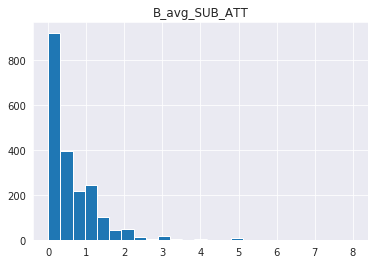

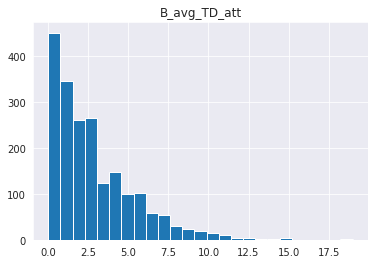

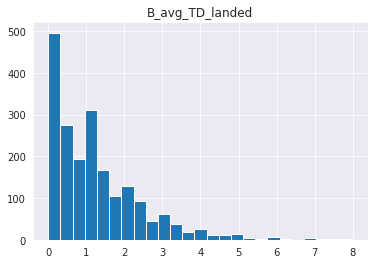

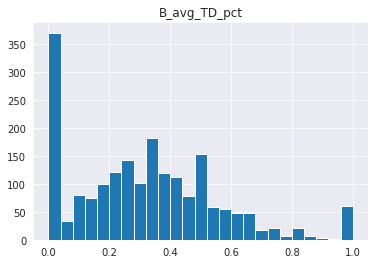

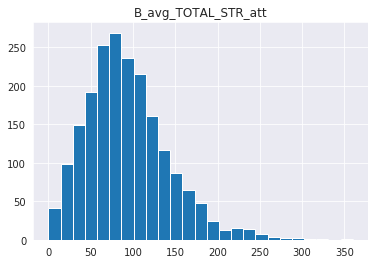

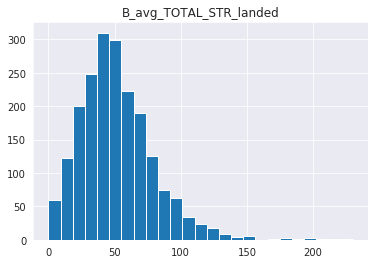

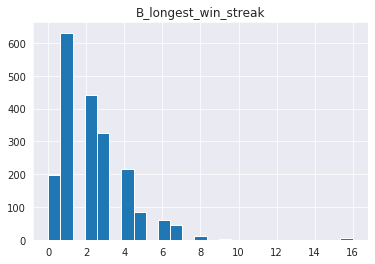

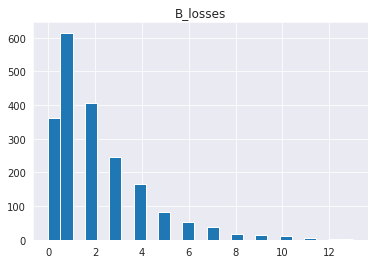

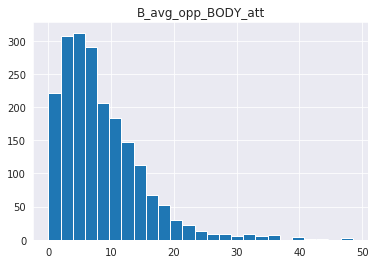

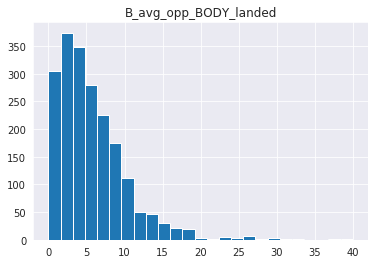

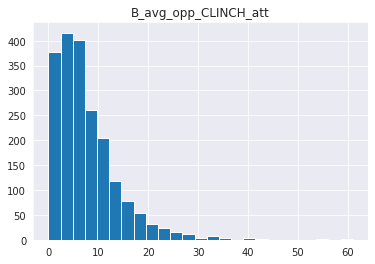

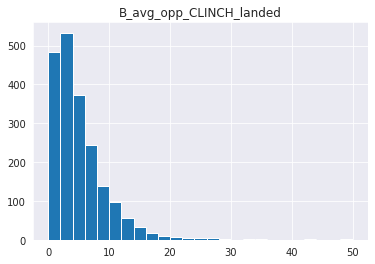

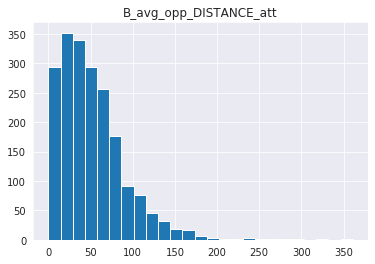

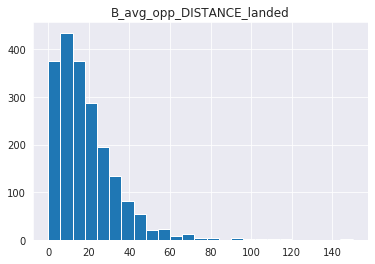

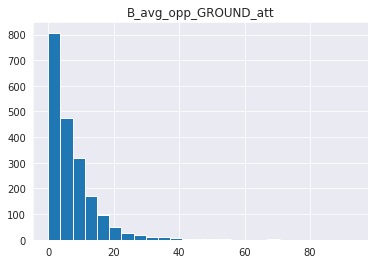

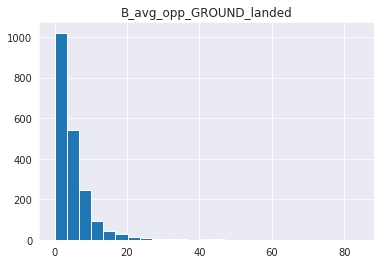

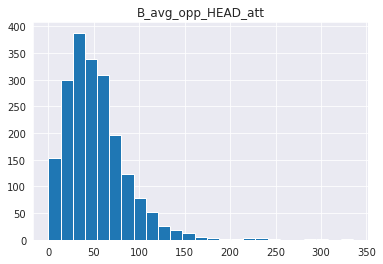

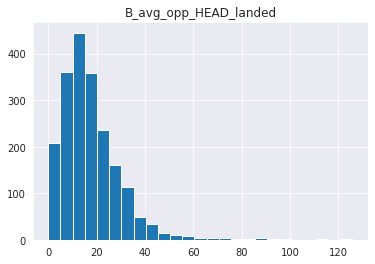

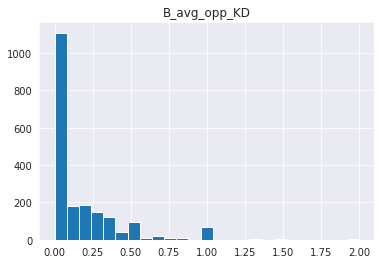

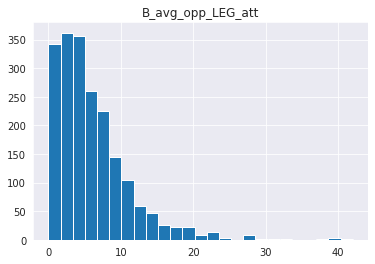

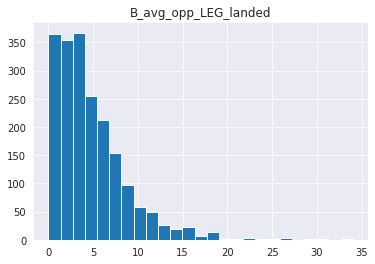

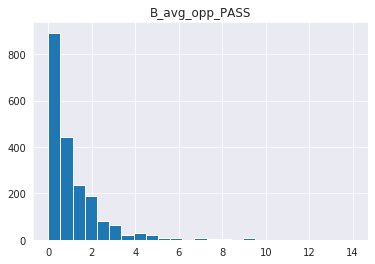

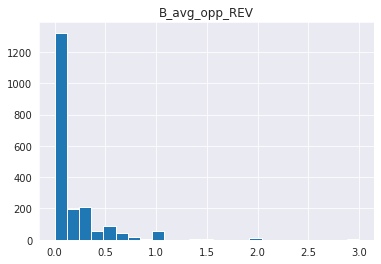

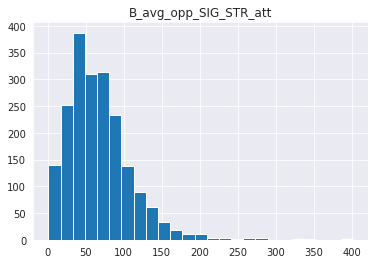

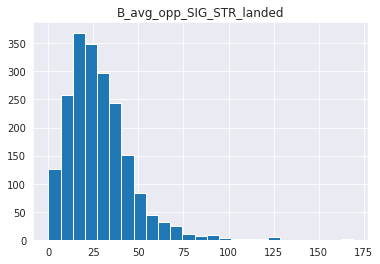

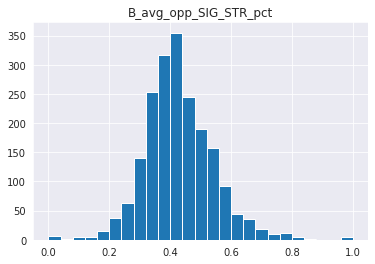

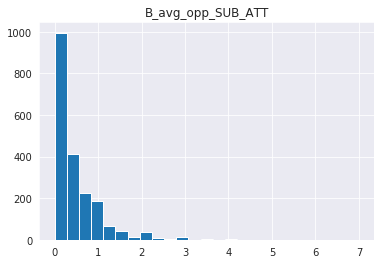

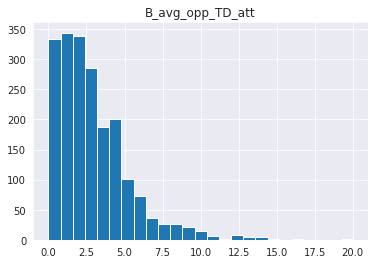

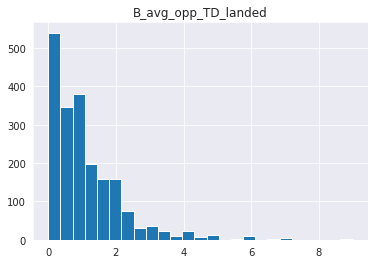

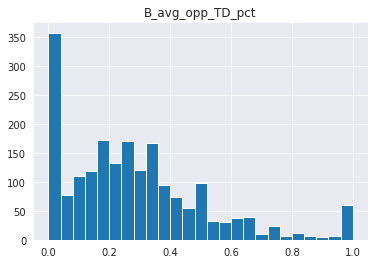

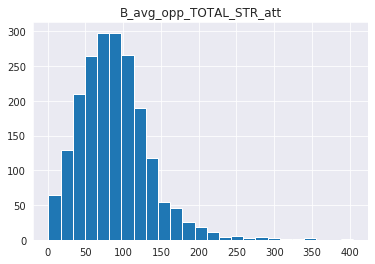

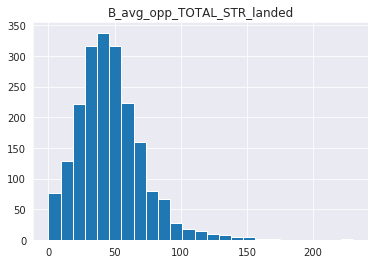

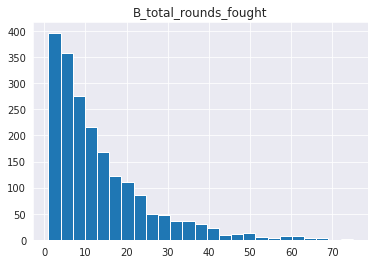

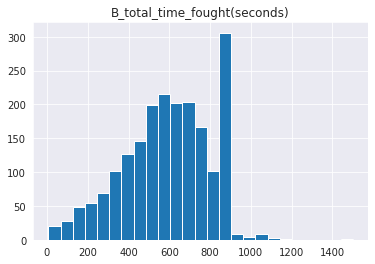

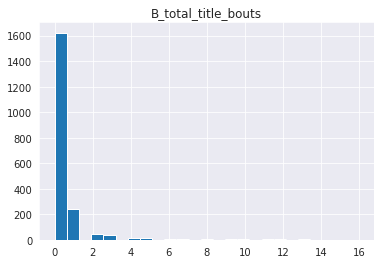

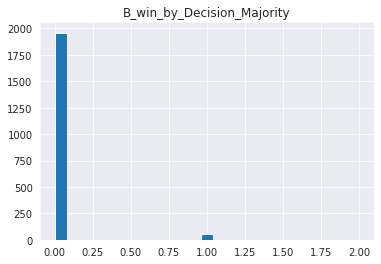

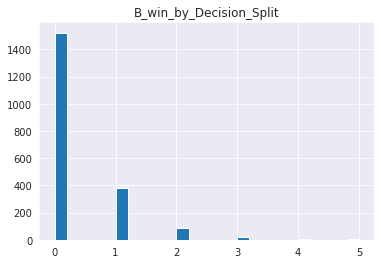

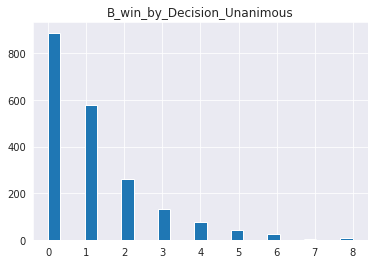

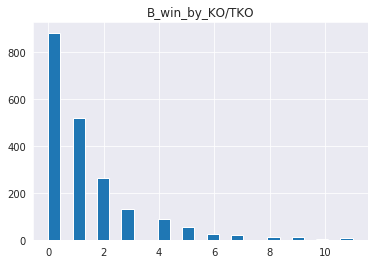

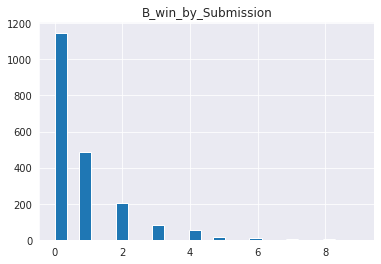

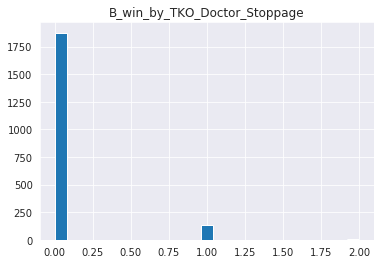

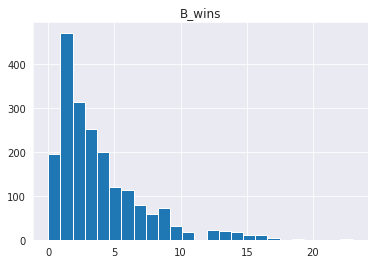

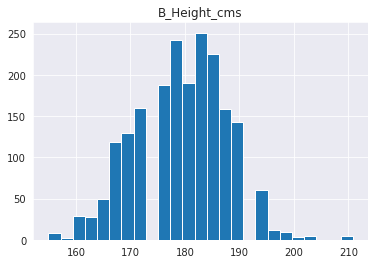

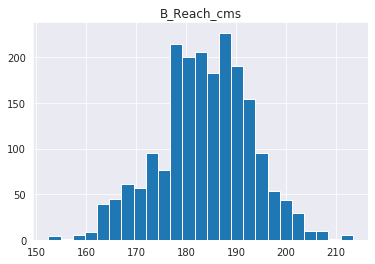

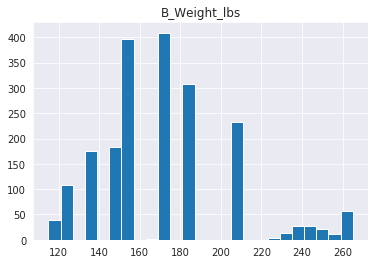

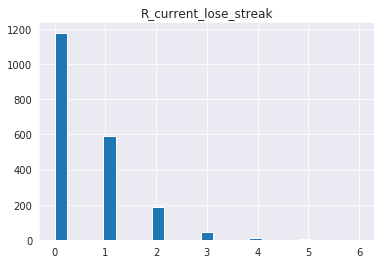

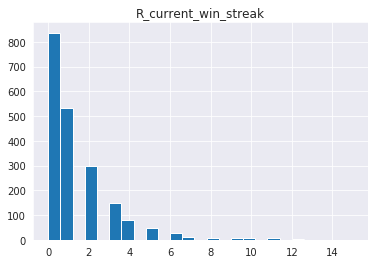

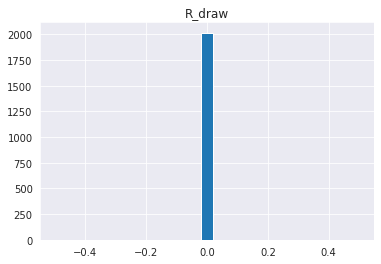

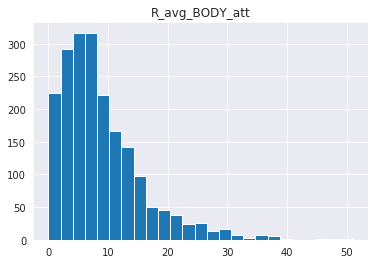

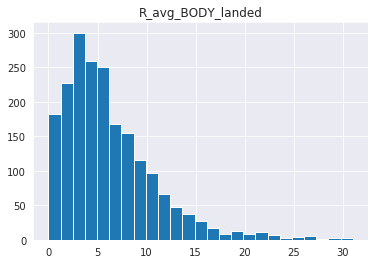

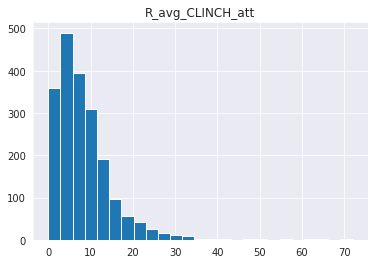

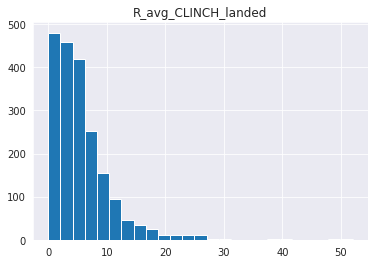

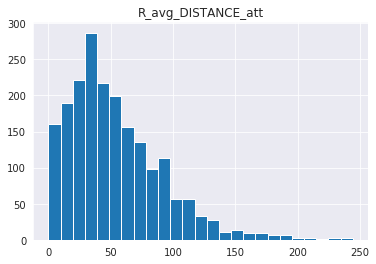

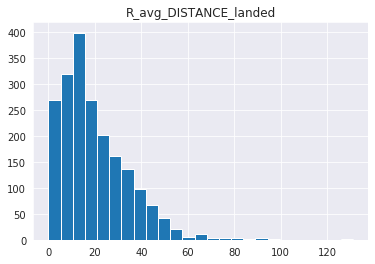

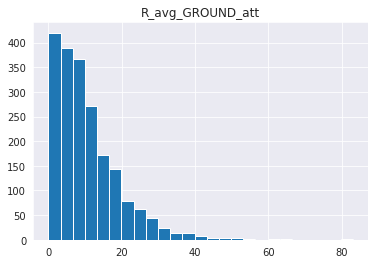

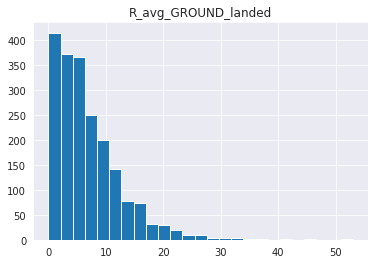

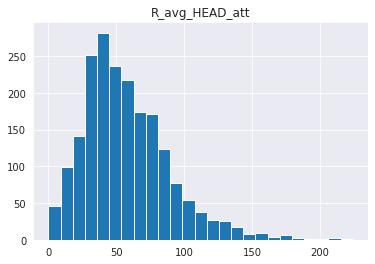

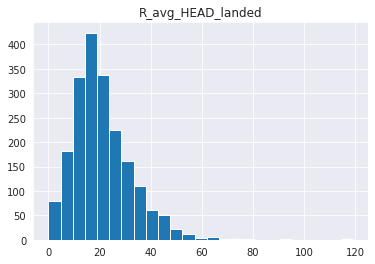

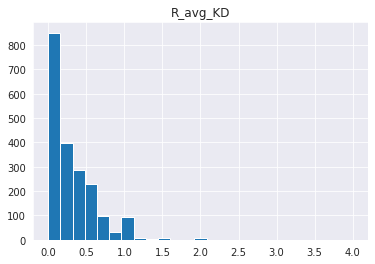

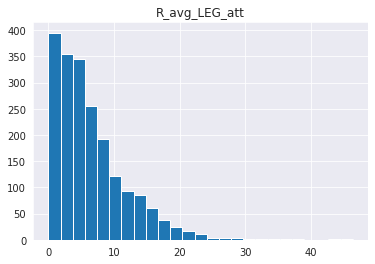

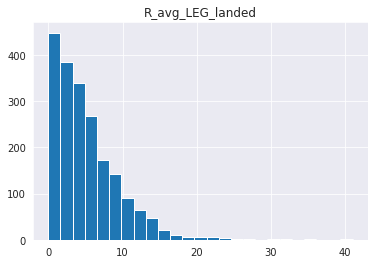

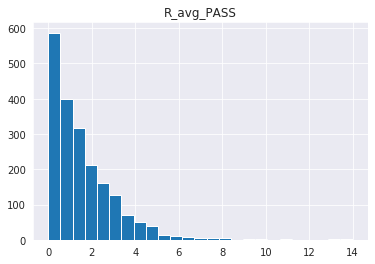

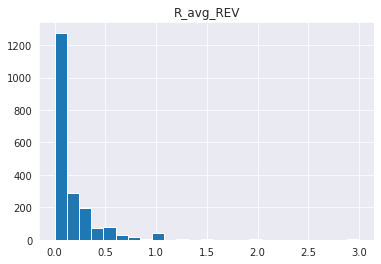

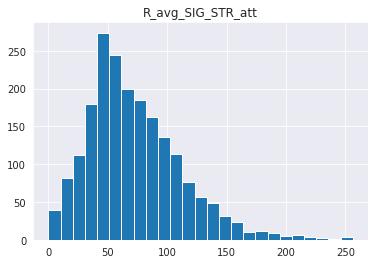

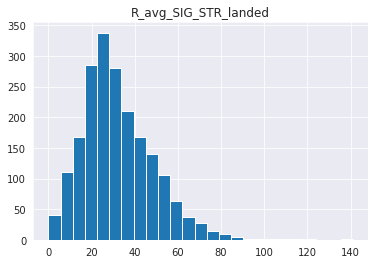

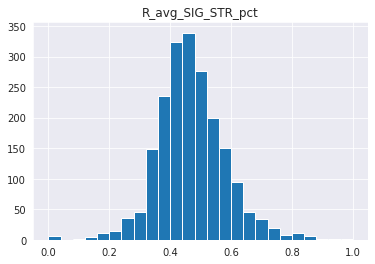

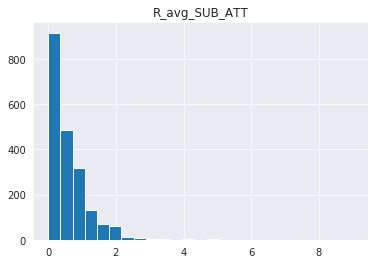

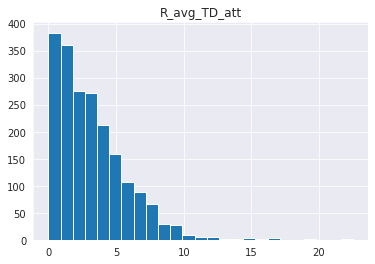

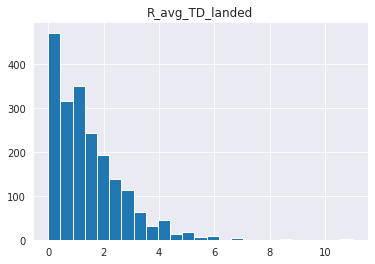

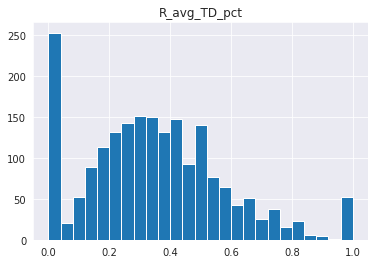

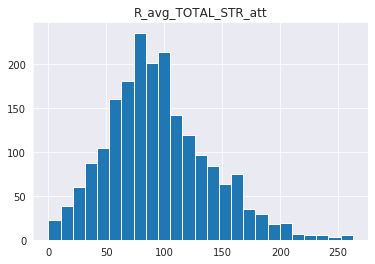

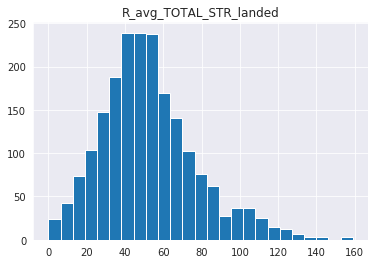

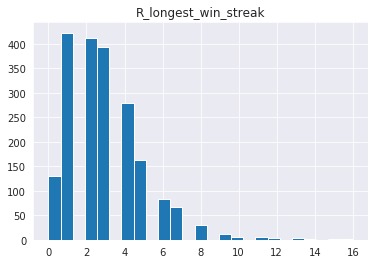

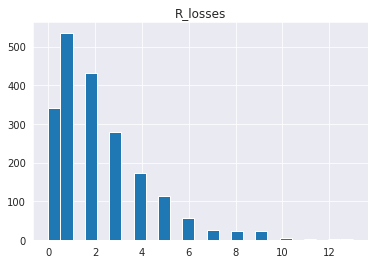

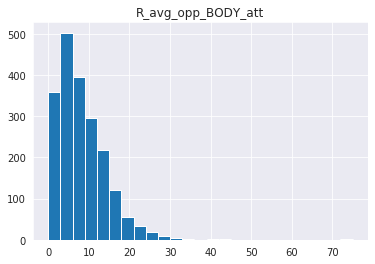

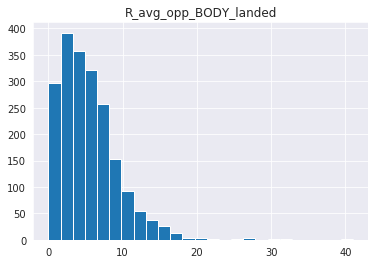

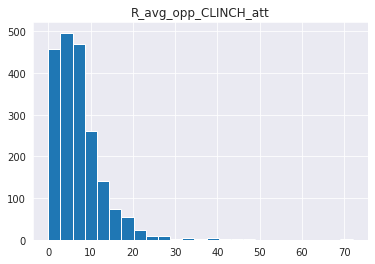

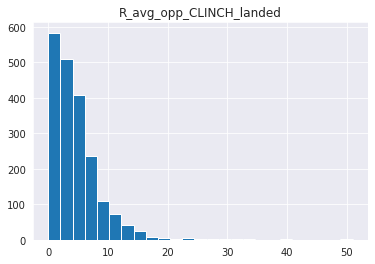

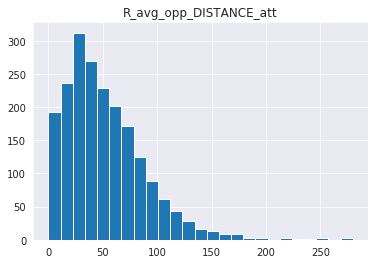

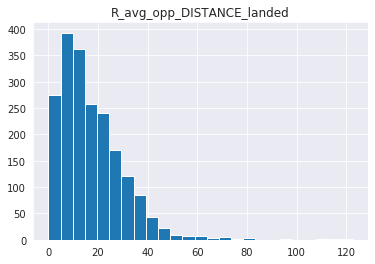

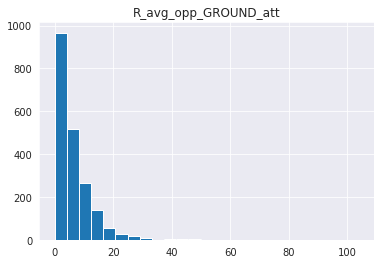

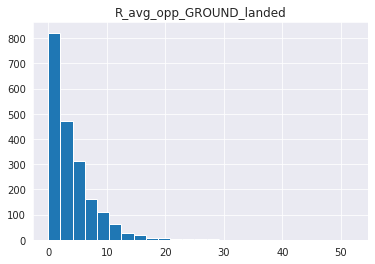

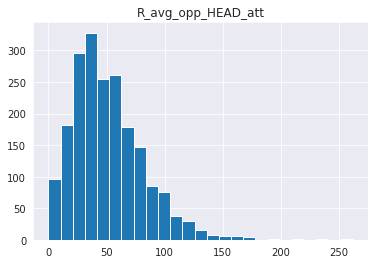

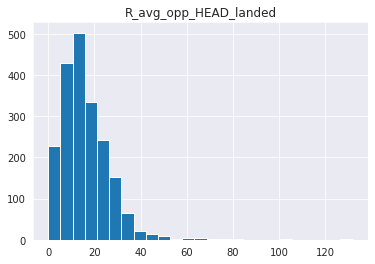

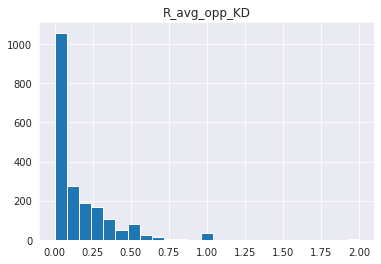

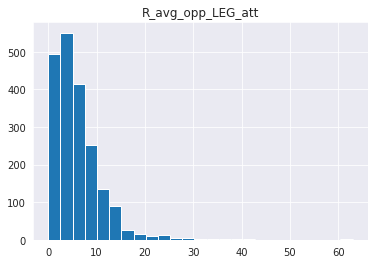

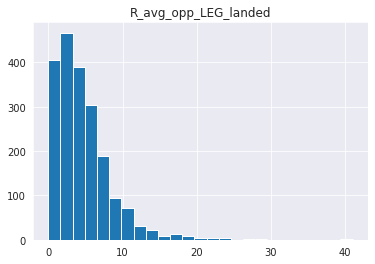

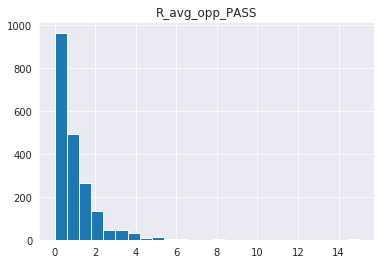

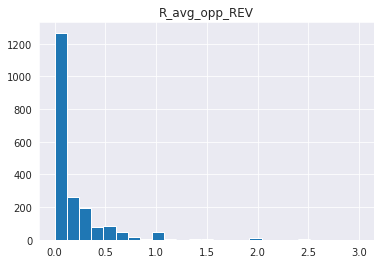

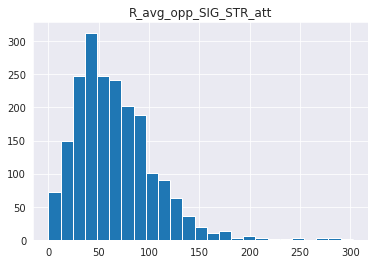

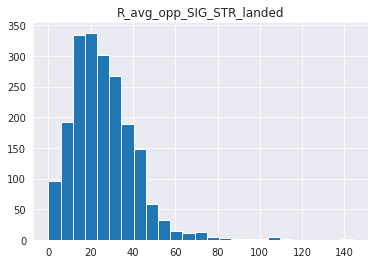

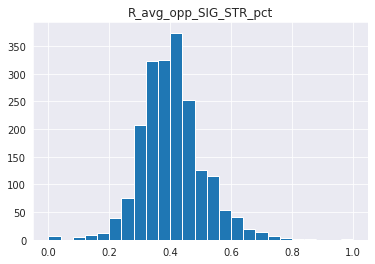

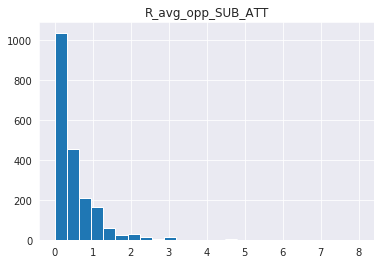

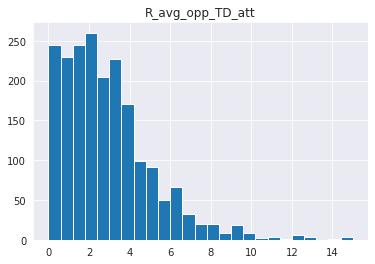

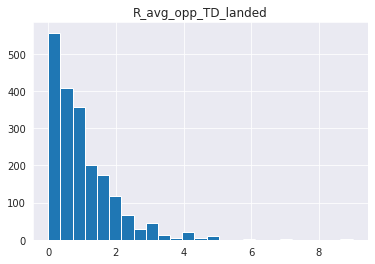

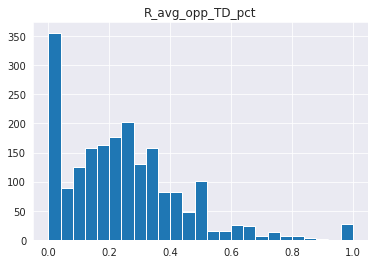

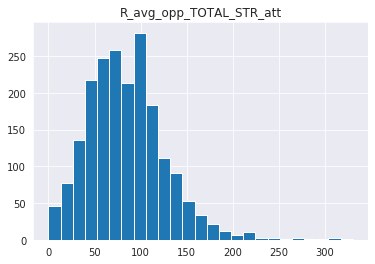

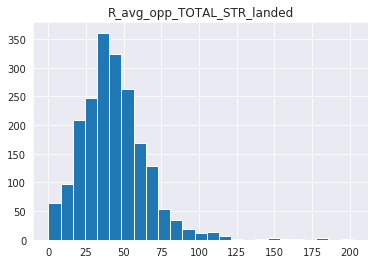

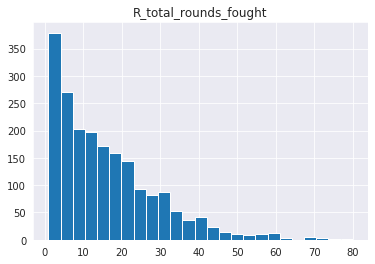

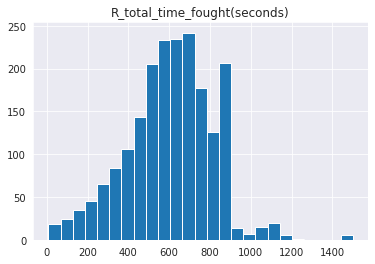

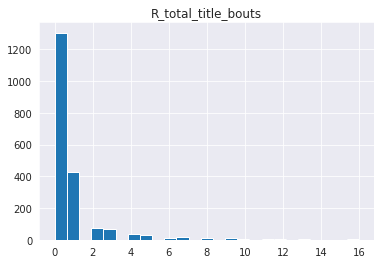

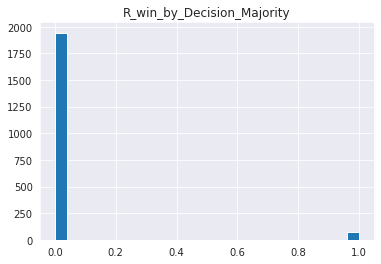

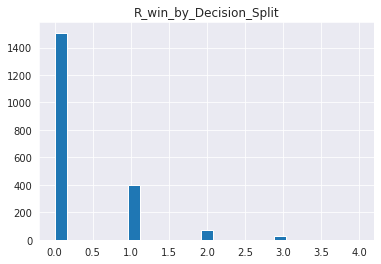

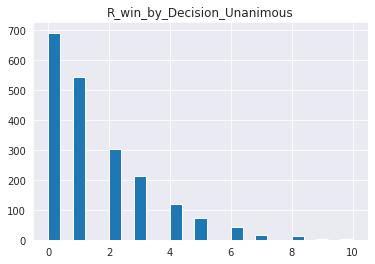

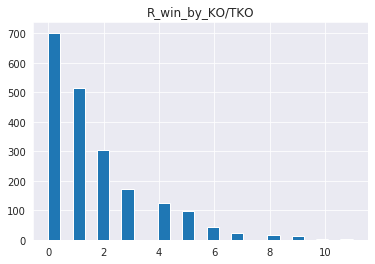

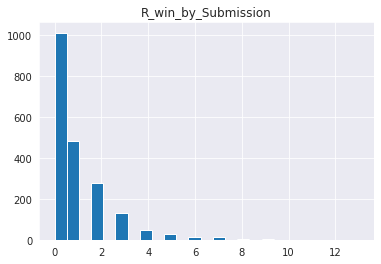

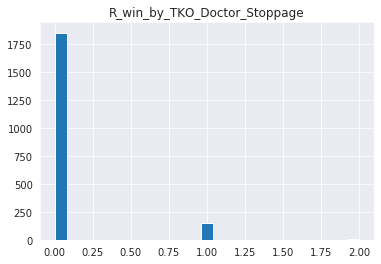

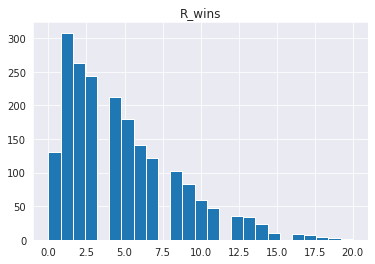

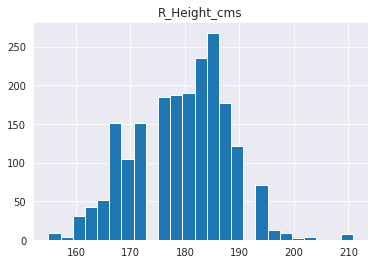

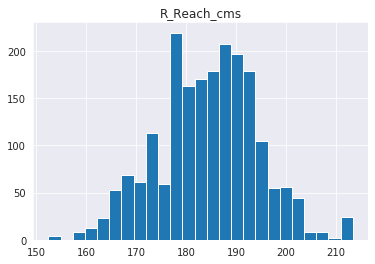

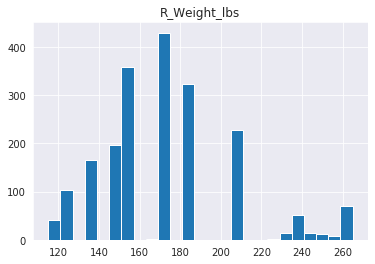

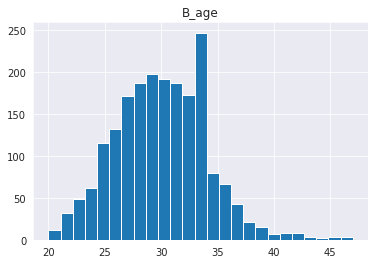

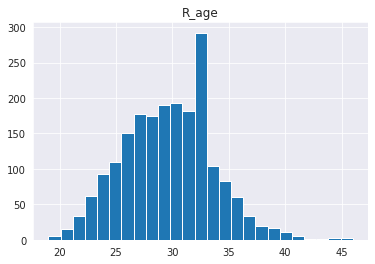

In [14]:
for col in cols:
    plt.title(col)
    plt.hist(df_Red[col], bins = 25)
    plt.show()

In [15]:
cols = list(df_blue.select_dtypes(exclude=['object','bool']).columns)

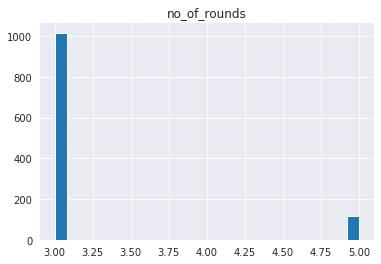

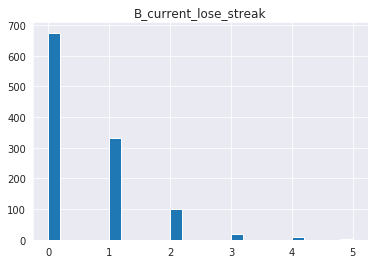

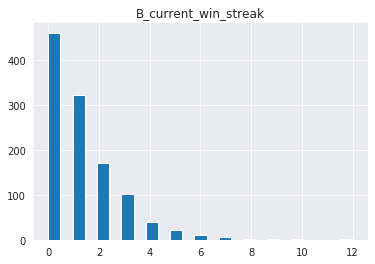

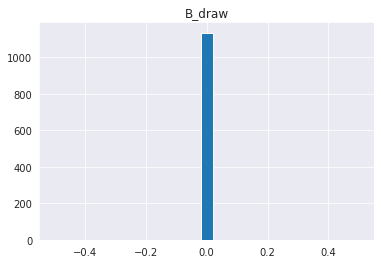

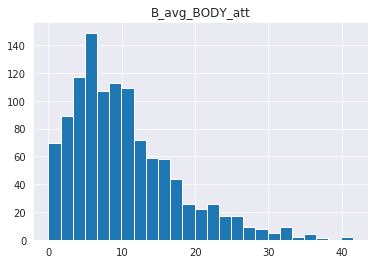

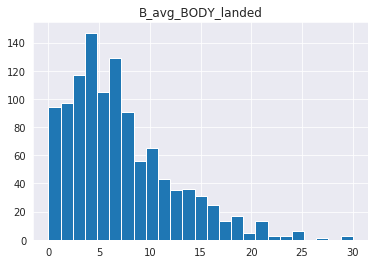

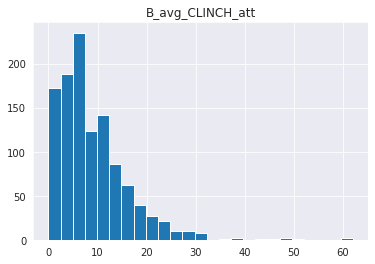

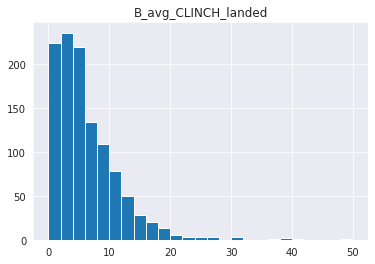

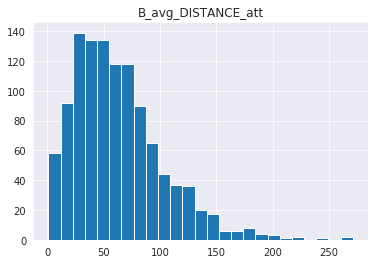

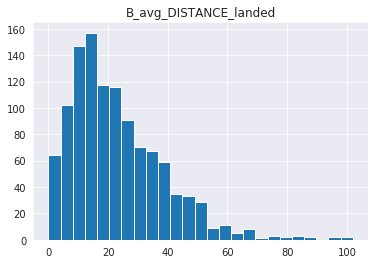

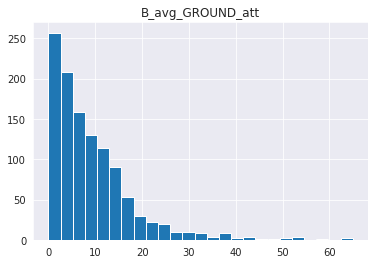

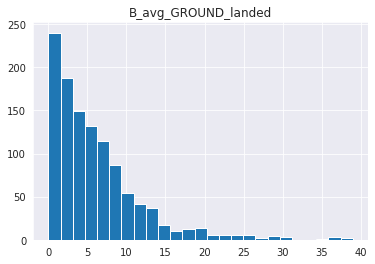

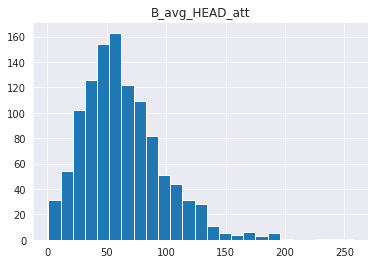

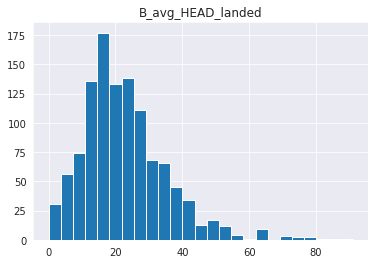

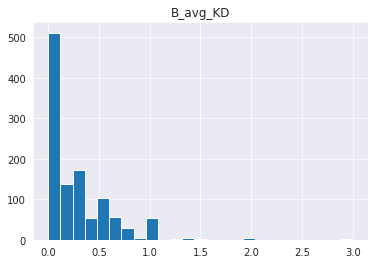

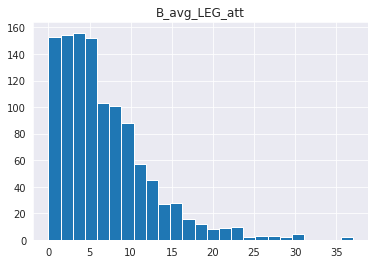

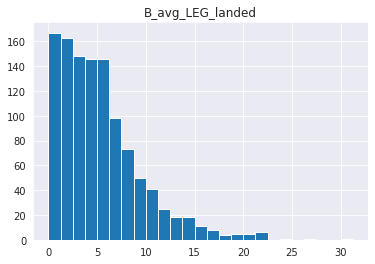

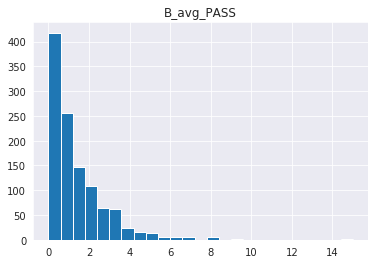

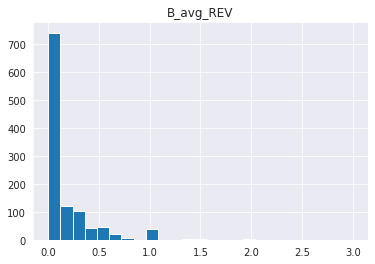

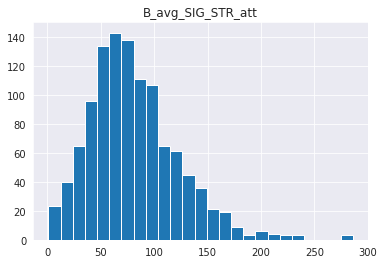

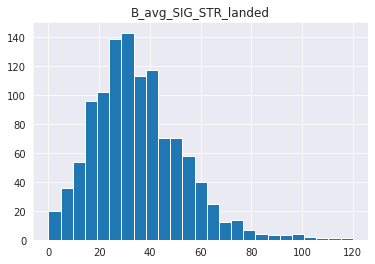

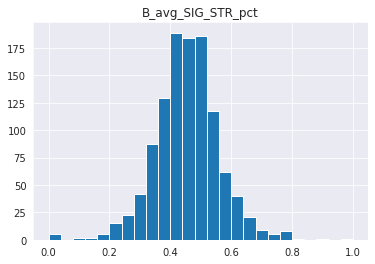

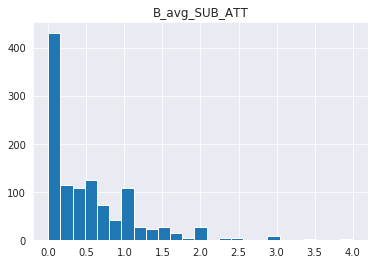

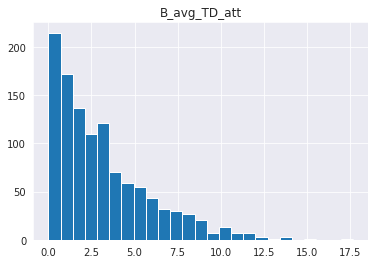

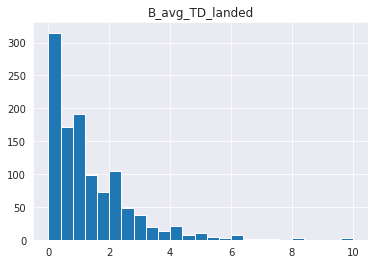

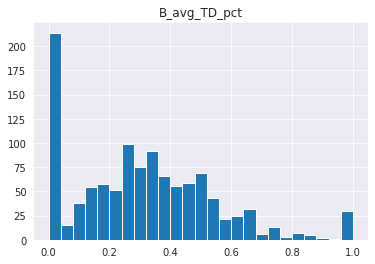

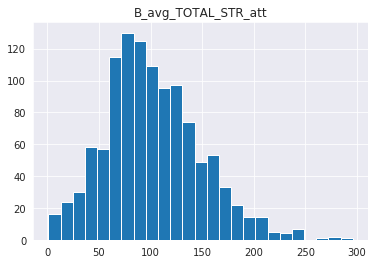

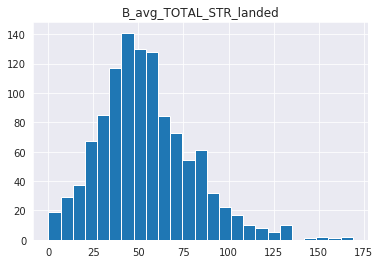

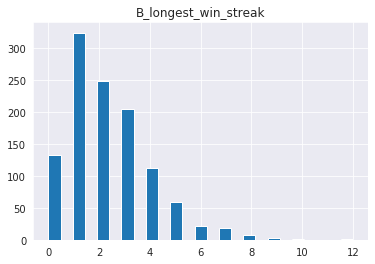

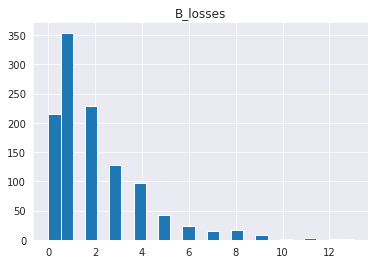

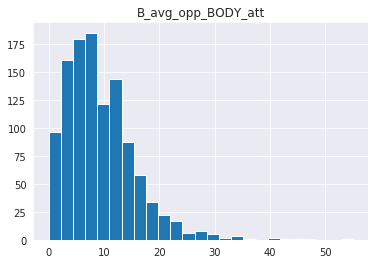

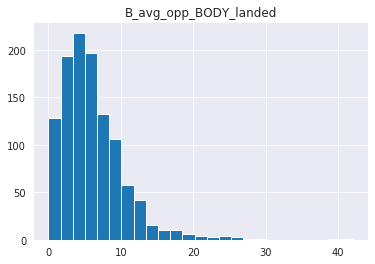

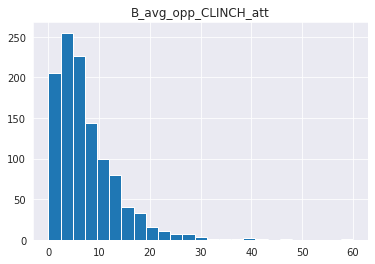

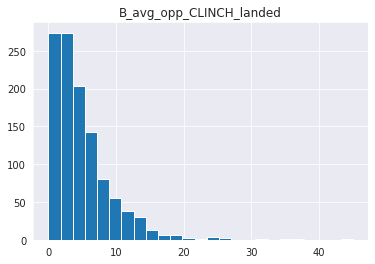

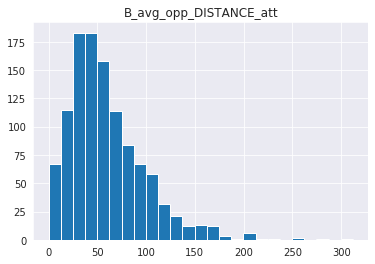

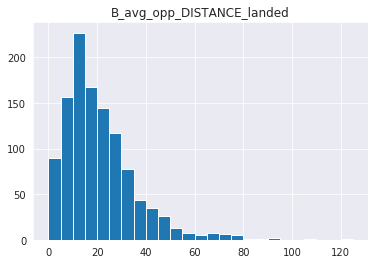

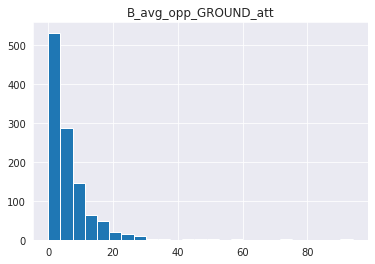

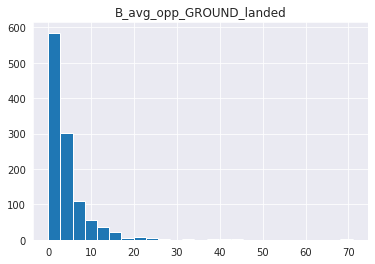

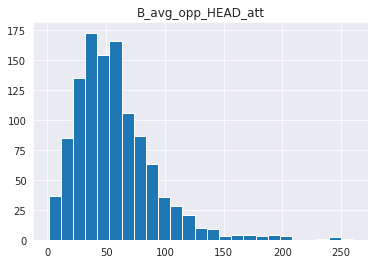

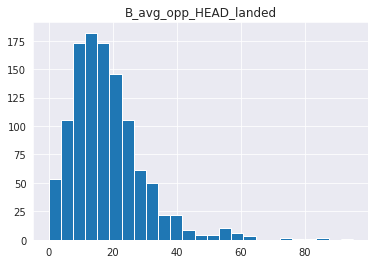

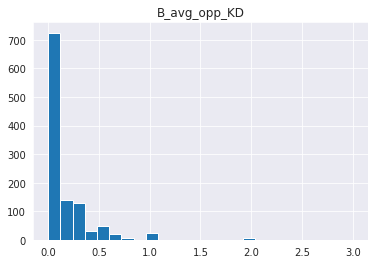

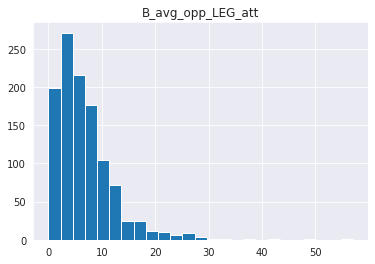

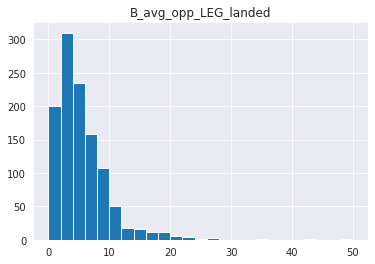

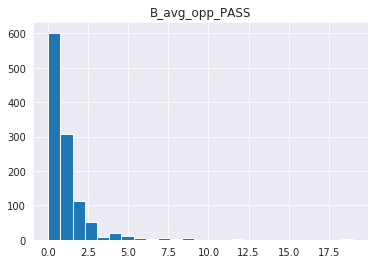

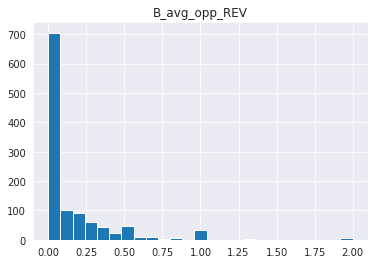

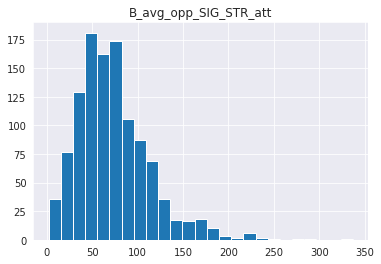

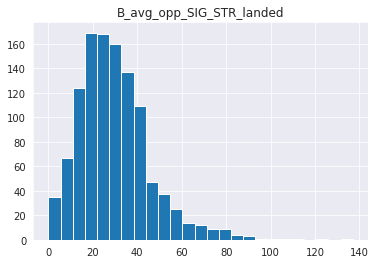

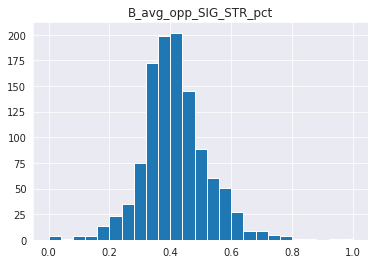

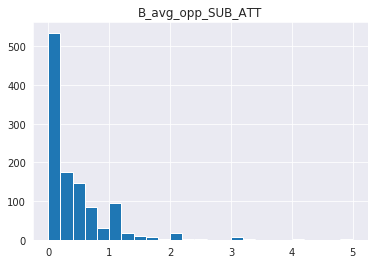

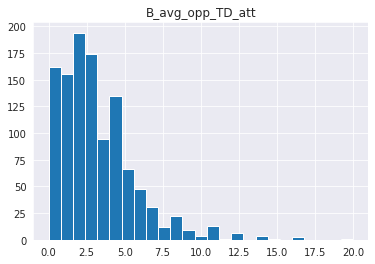

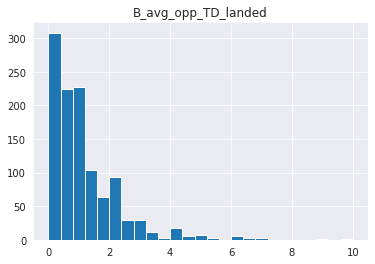

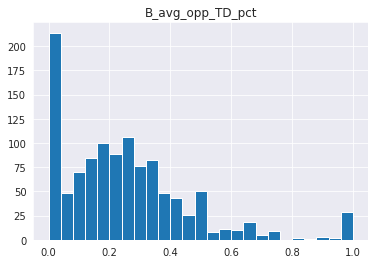

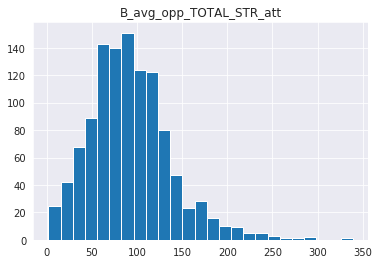

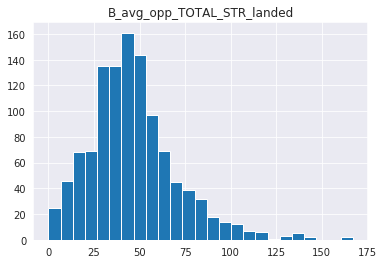

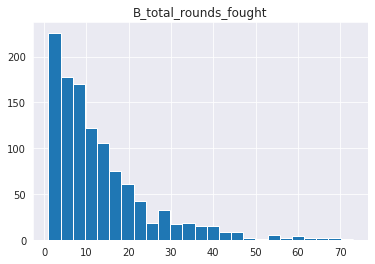

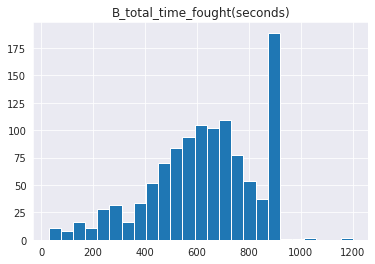

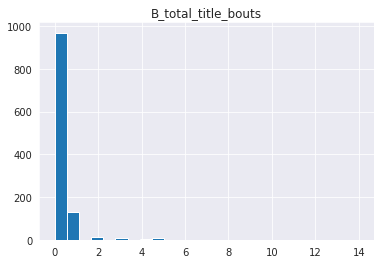

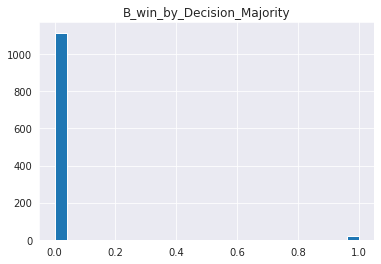

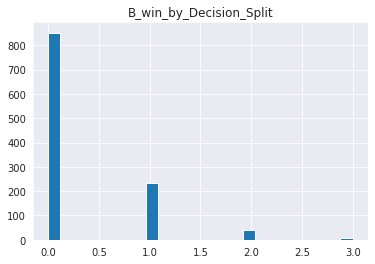

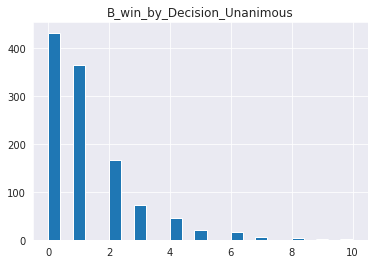

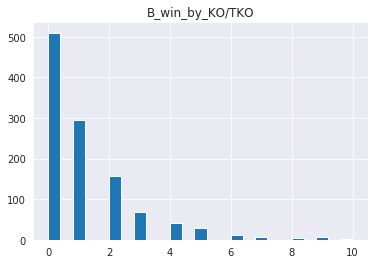

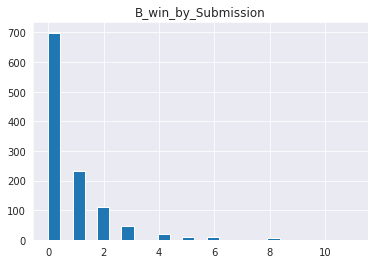

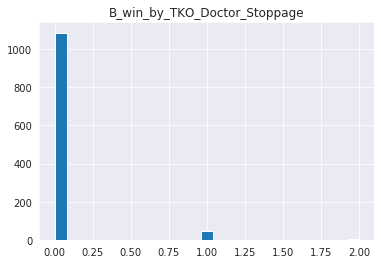

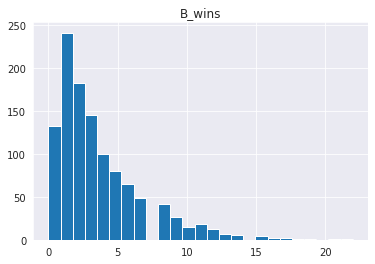

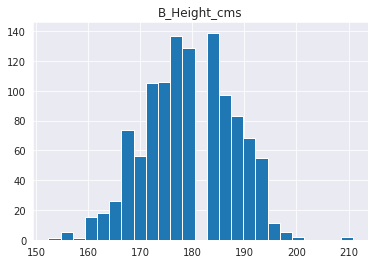

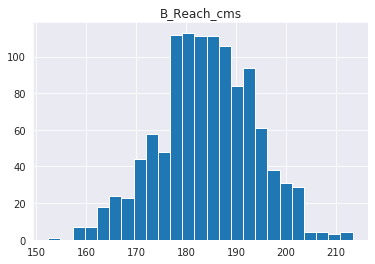

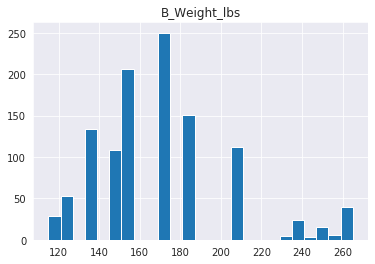

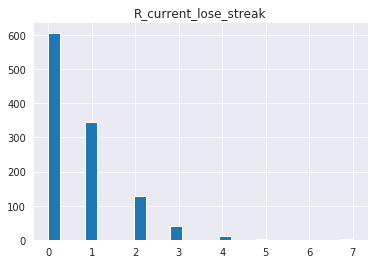

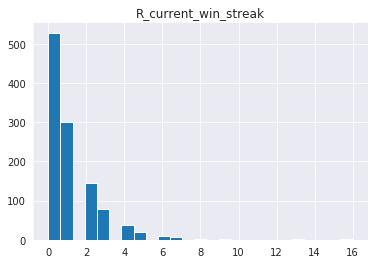

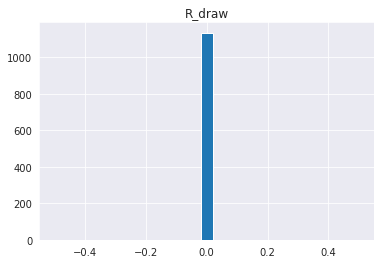

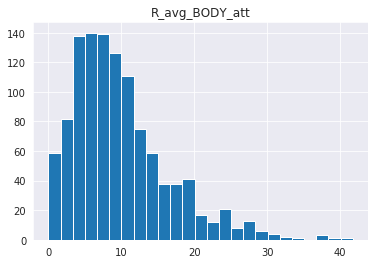

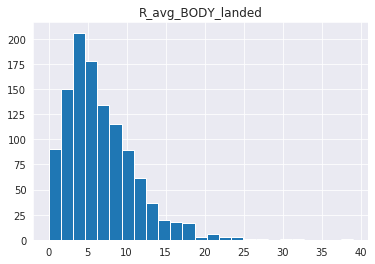

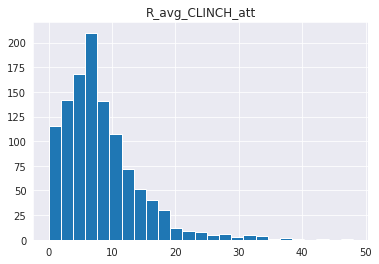

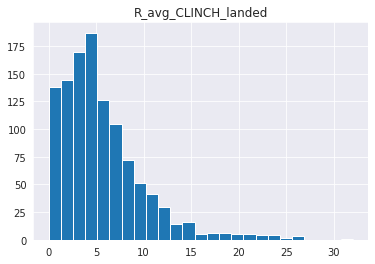

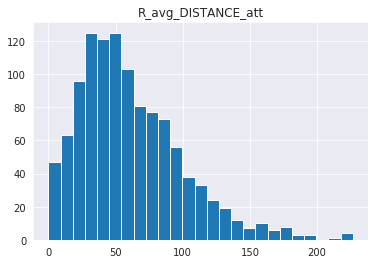

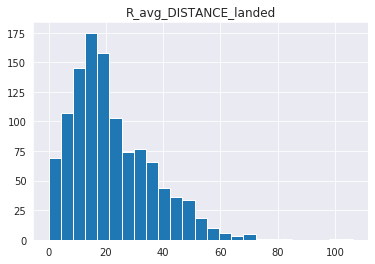

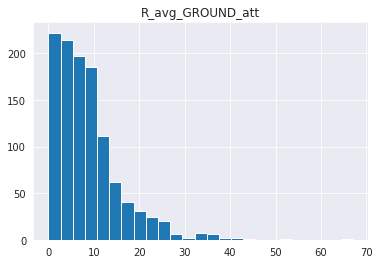

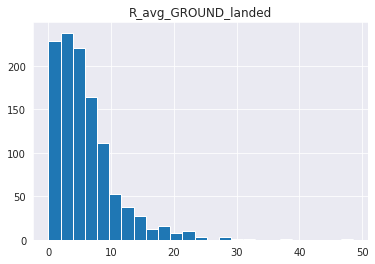

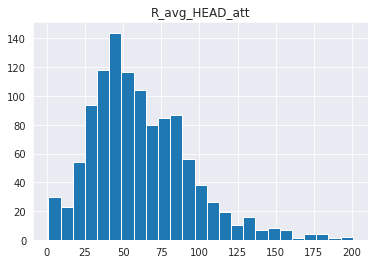

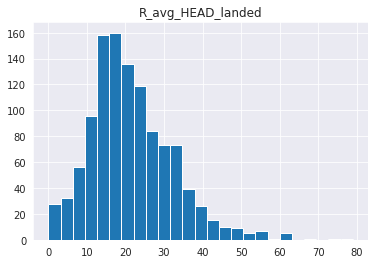

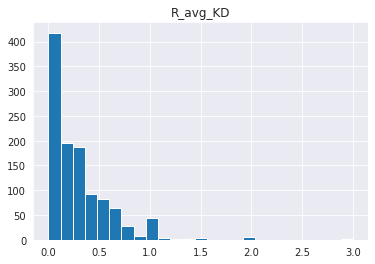

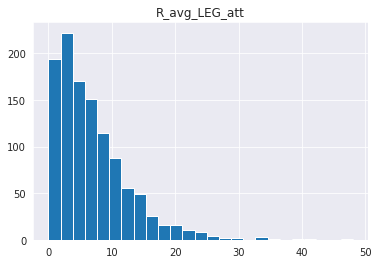

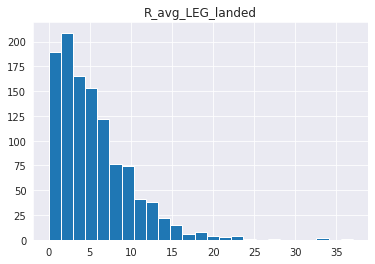

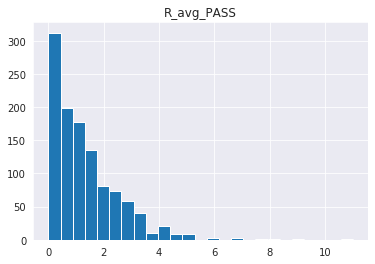

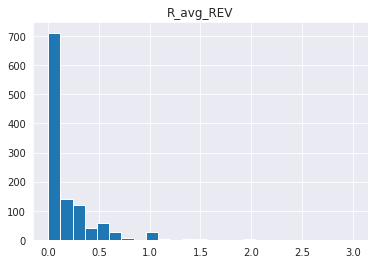

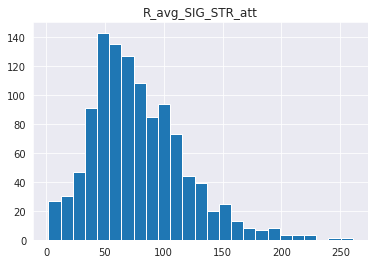

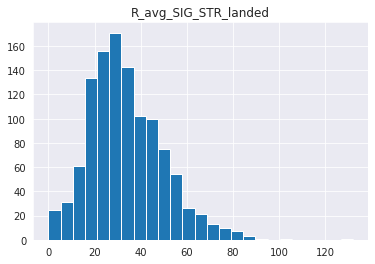

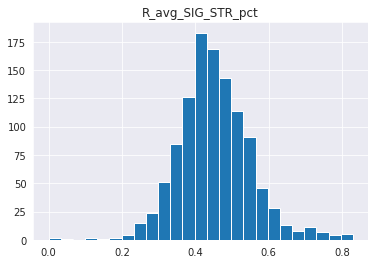

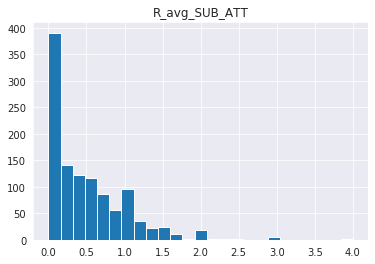

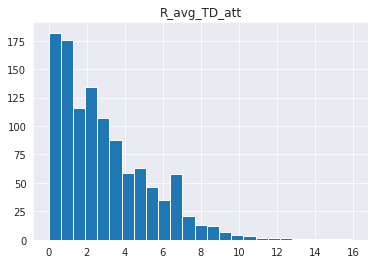

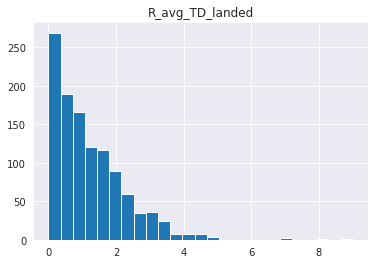

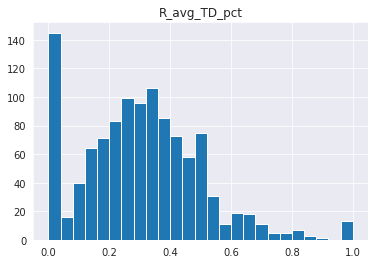

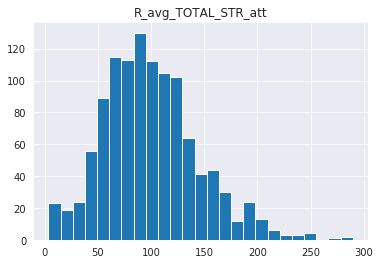

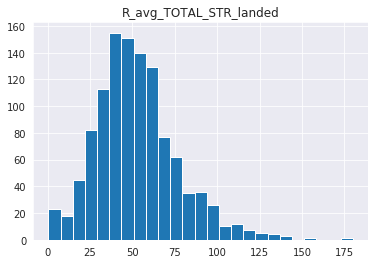

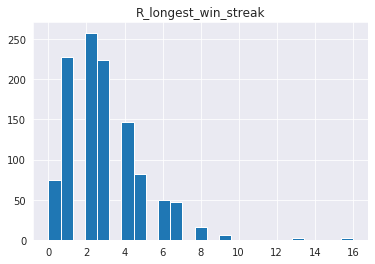

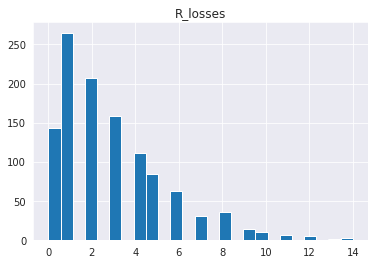

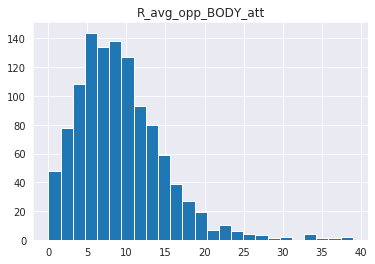

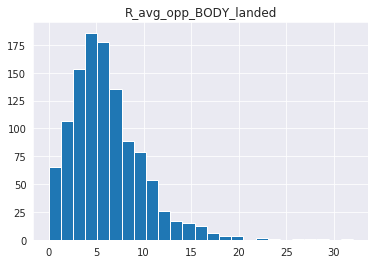

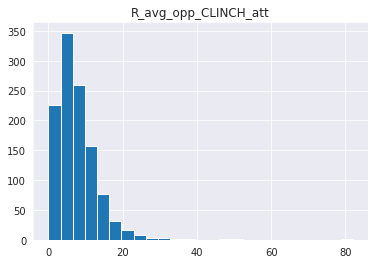

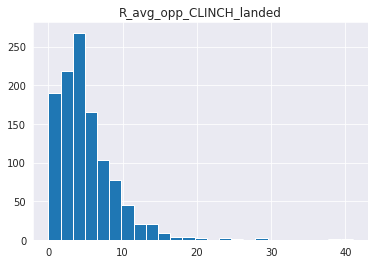

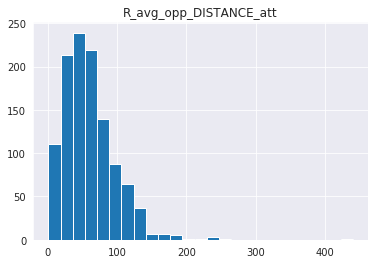

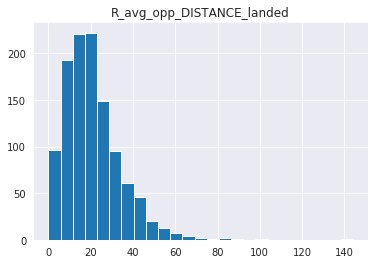

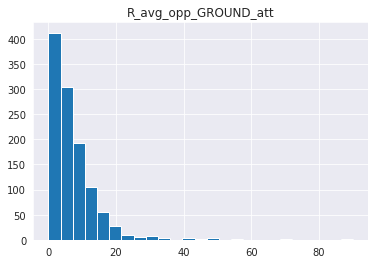

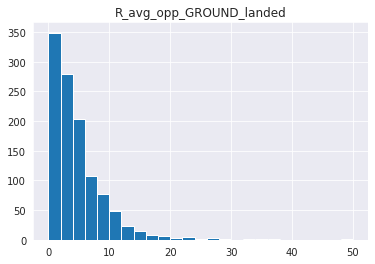

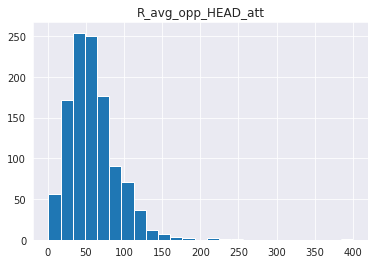

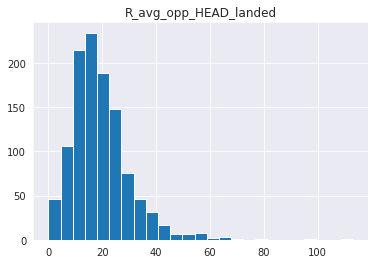

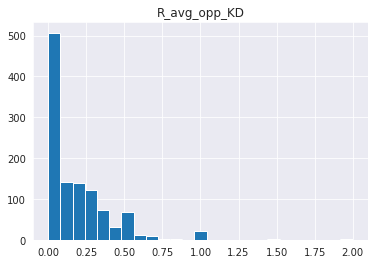

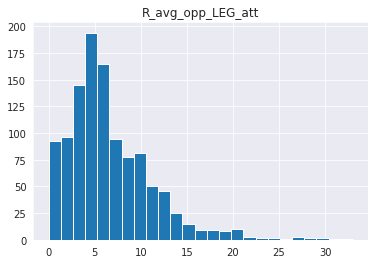

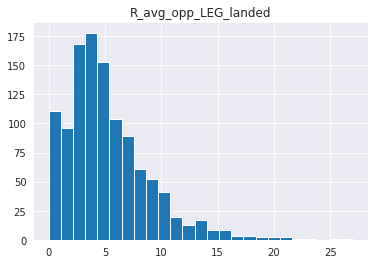

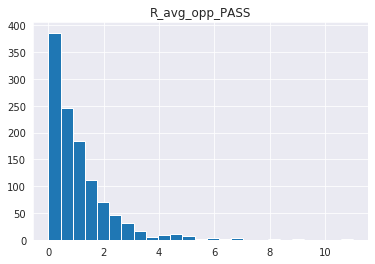

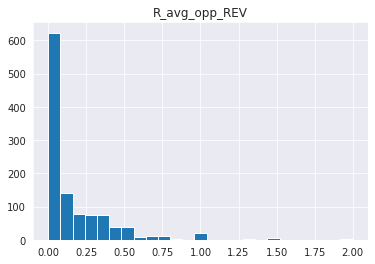

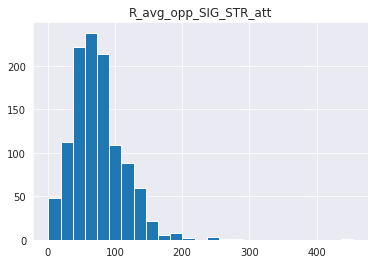

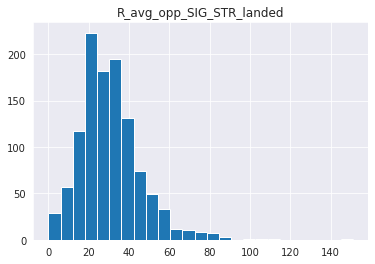

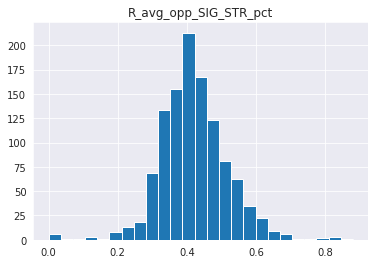

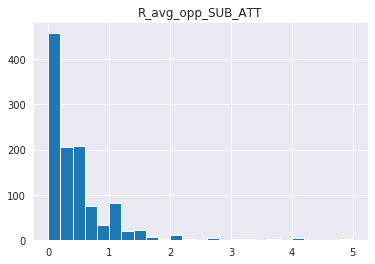

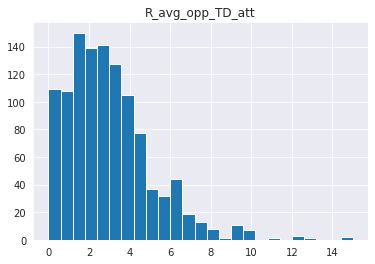

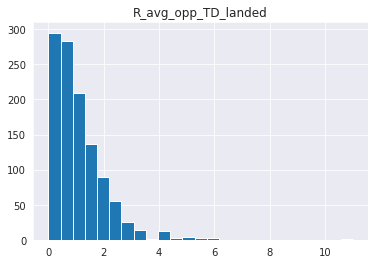

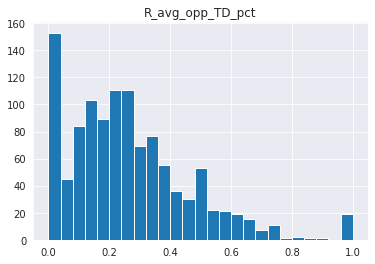

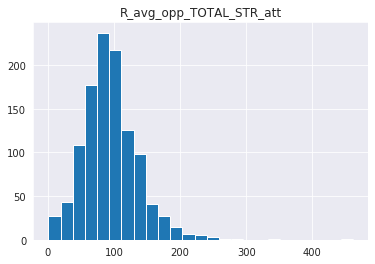

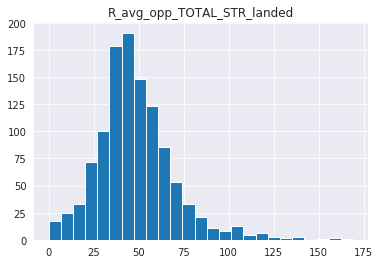

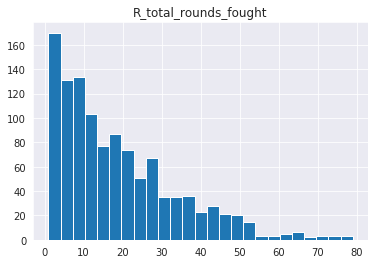

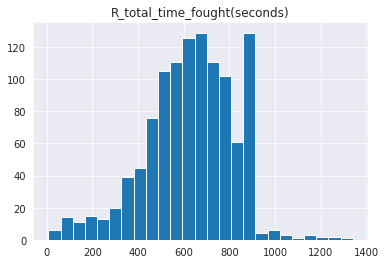

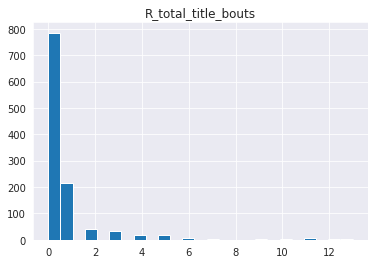

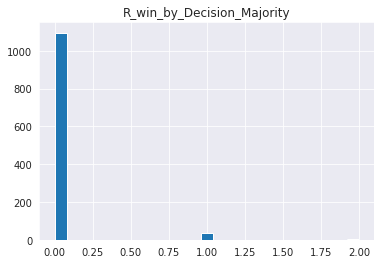

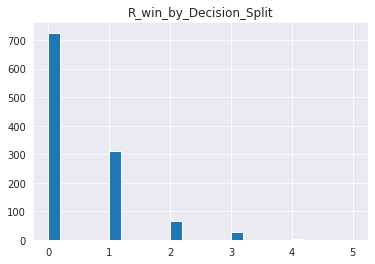

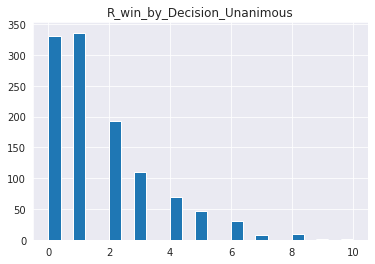

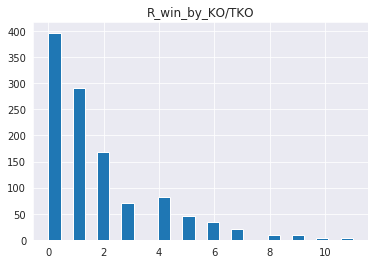

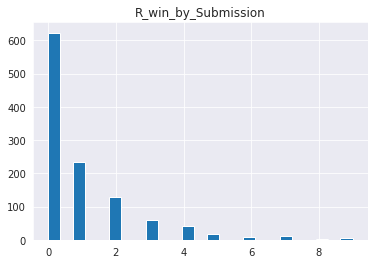

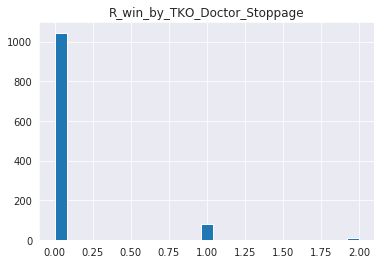

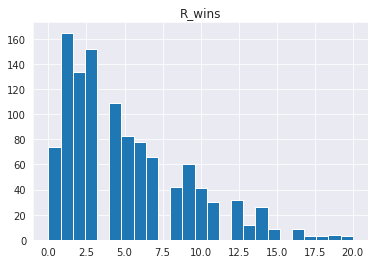

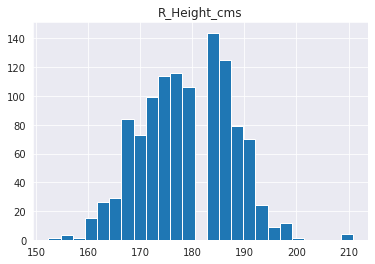

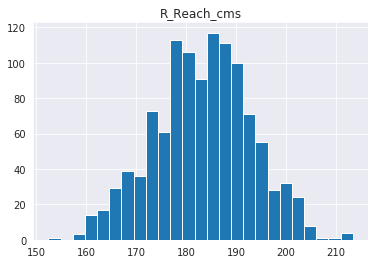

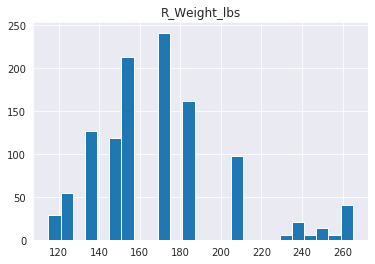

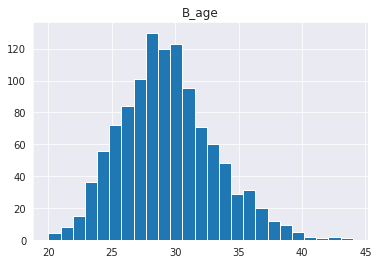

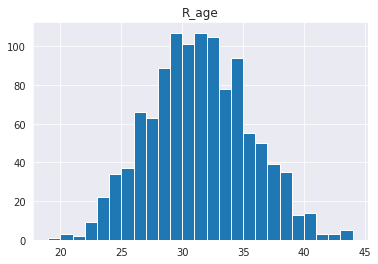

In [16]:
for col in cols:
    plt.title(col)
    plt.hist(df_blue[col], bins = 25)
    plt.show()

In [17]:
df.Winner.value_counts()

Red     2016
Blue    1135
Draw      51
Name: Winner, dtype: int64

In [18]:
cols = list(df.select_dtypes(exclude=['object','bool']).columns)

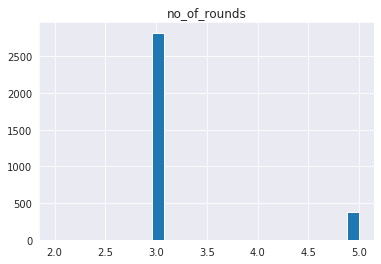

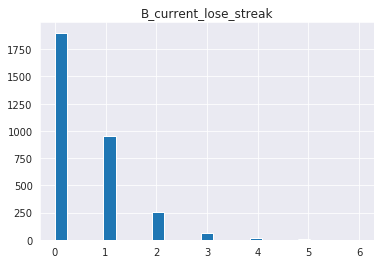

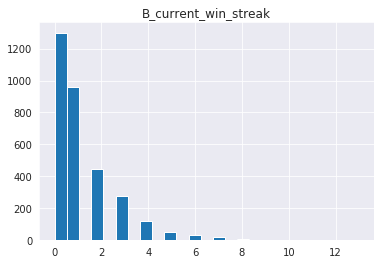

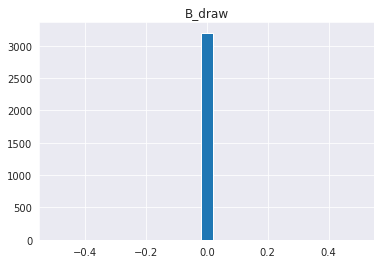

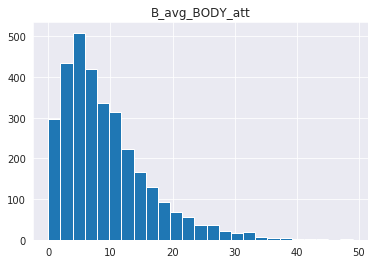

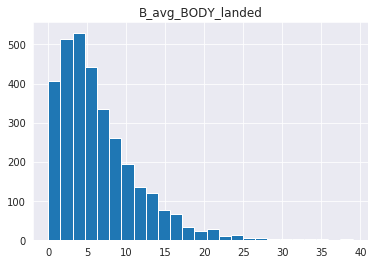

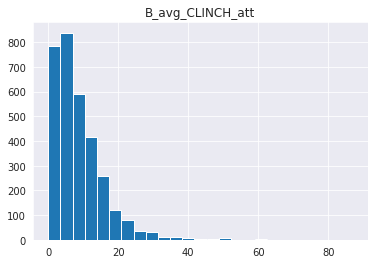

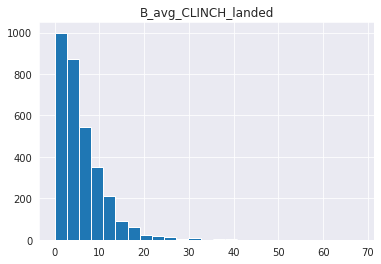

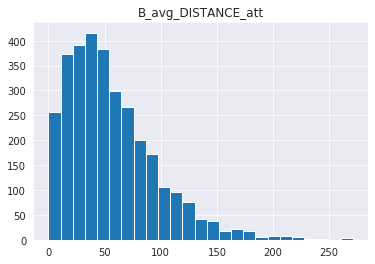

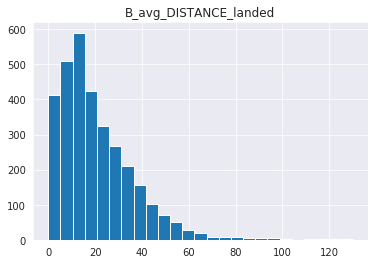

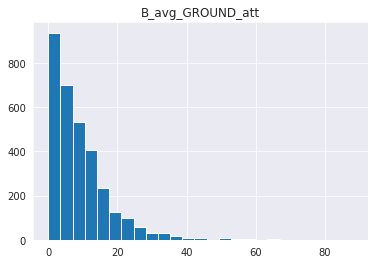

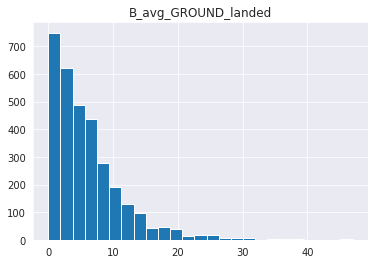

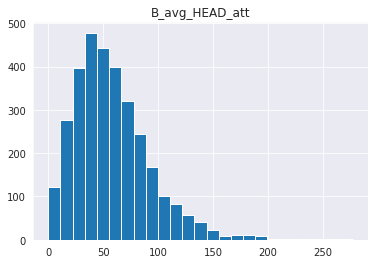

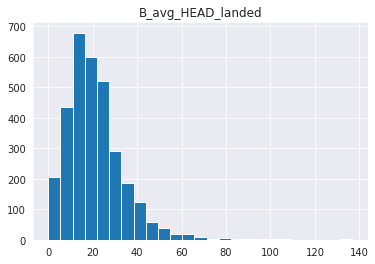

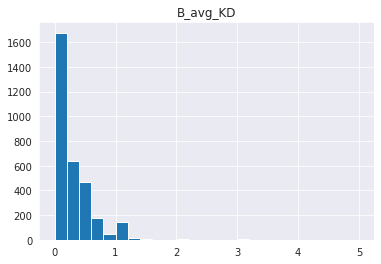

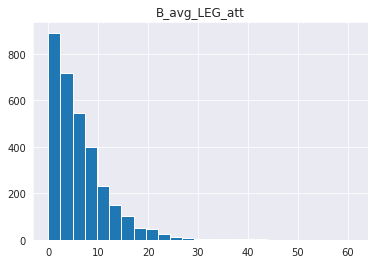

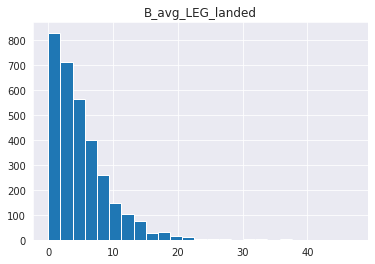

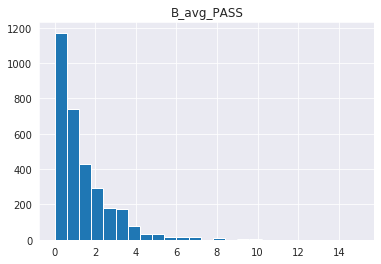

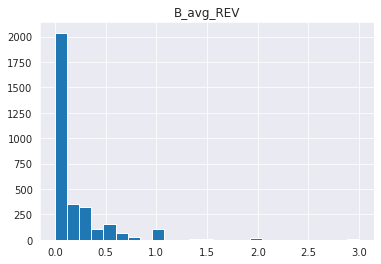

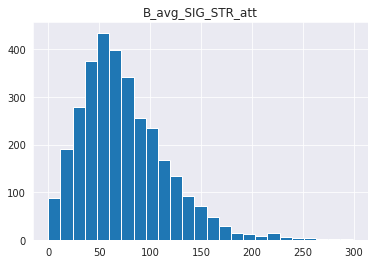

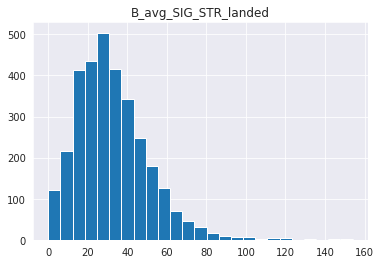

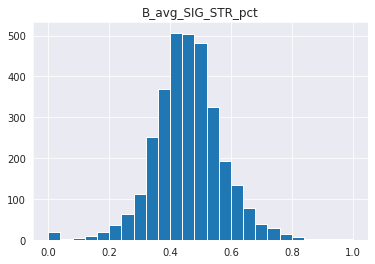

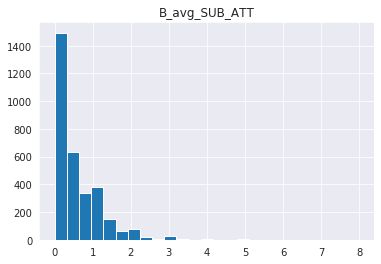

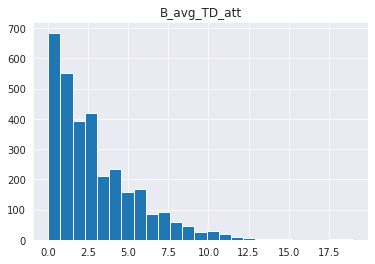

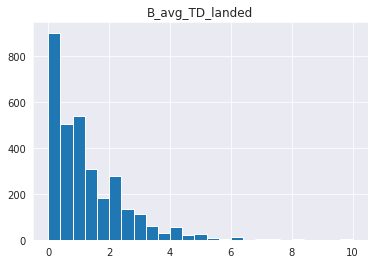

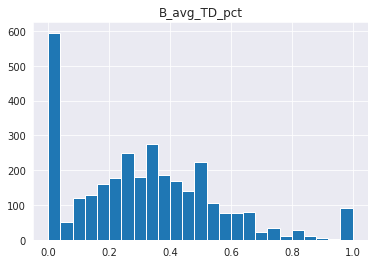

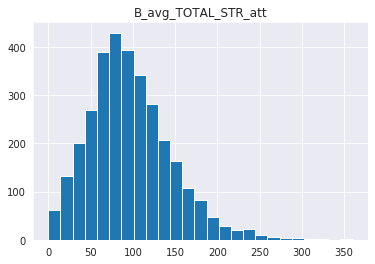

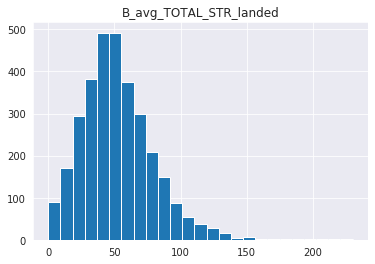

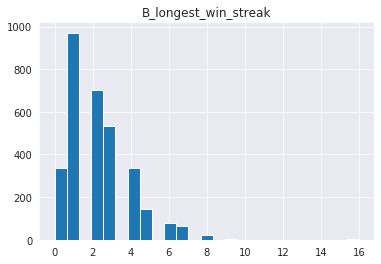

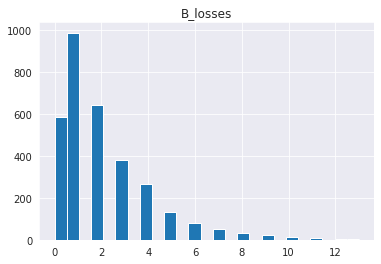

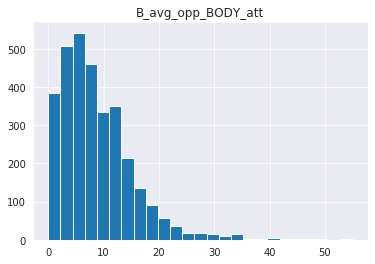

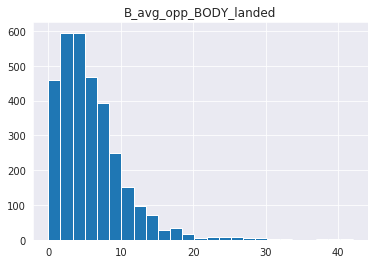

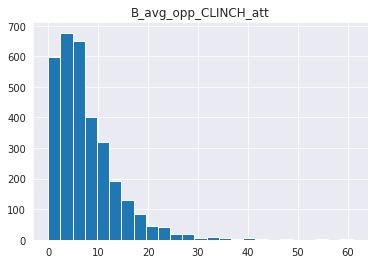

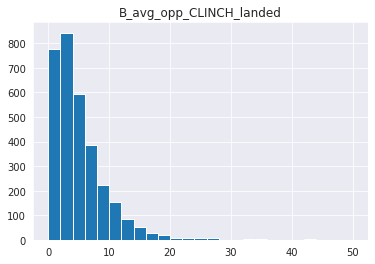

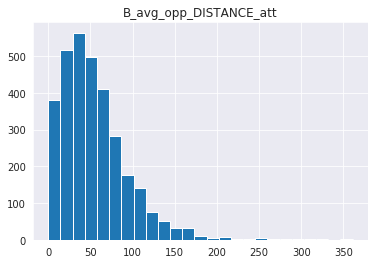

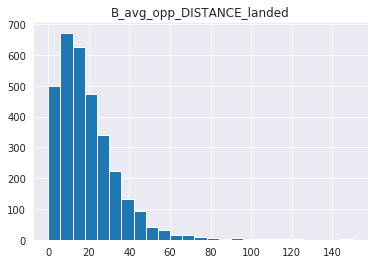

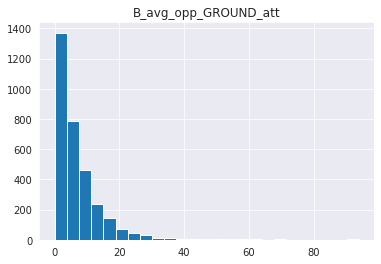

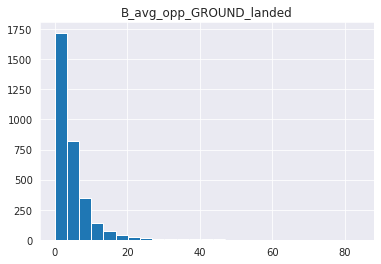

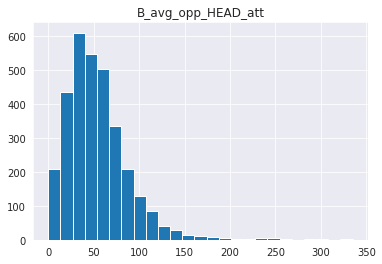

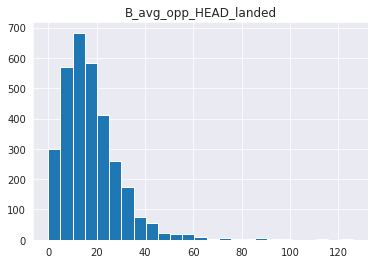

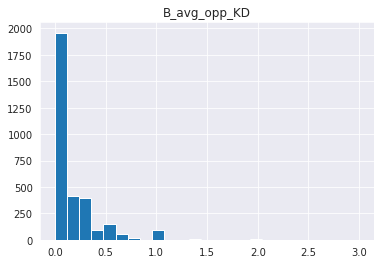

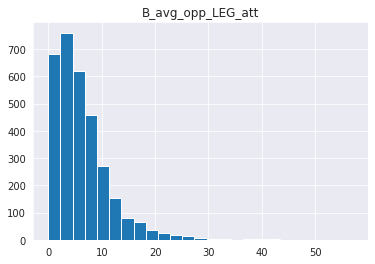

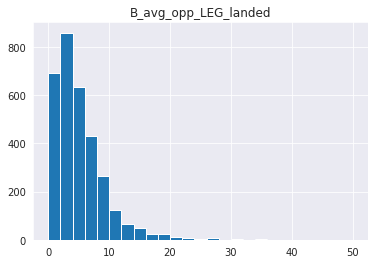

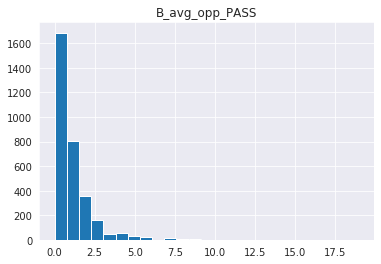

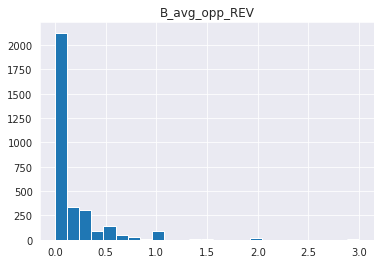

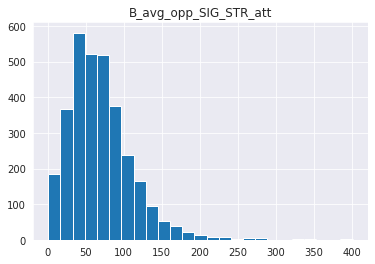

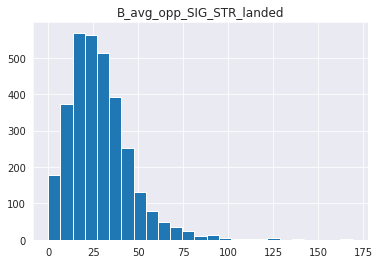

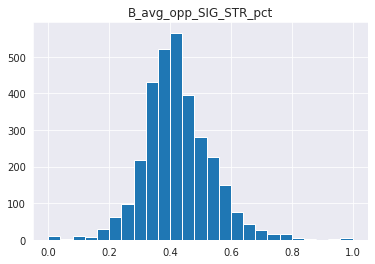

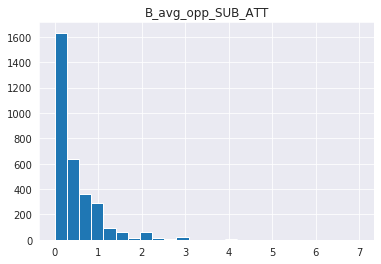

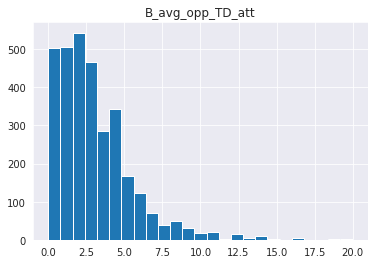

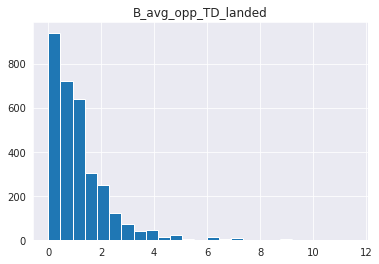

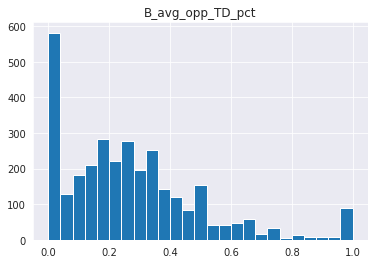

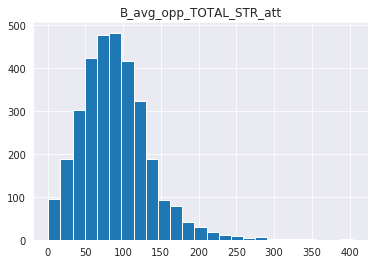

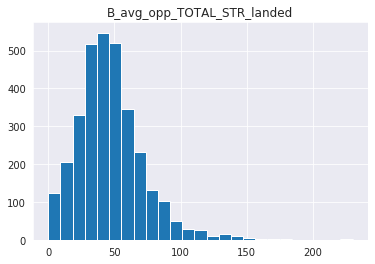

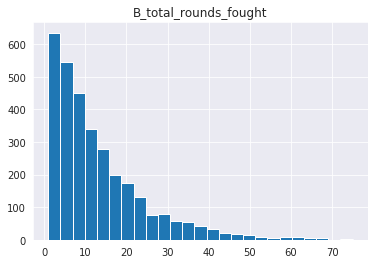

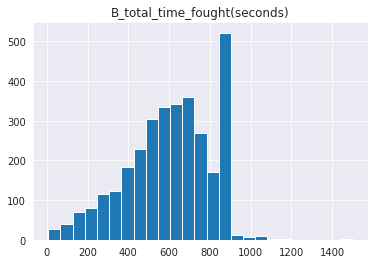

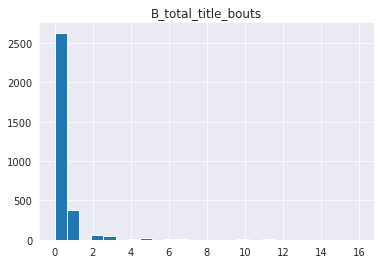

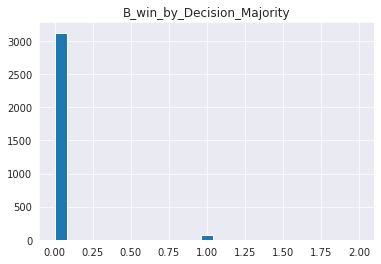

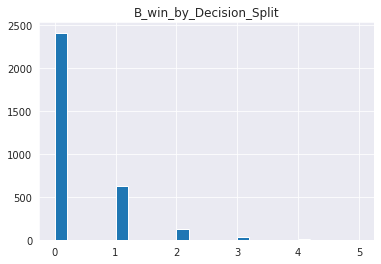

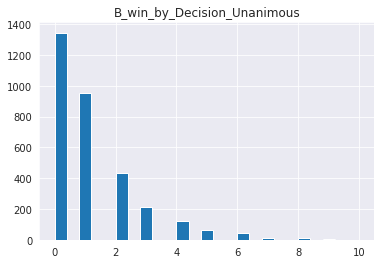

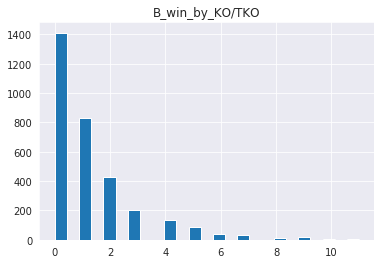

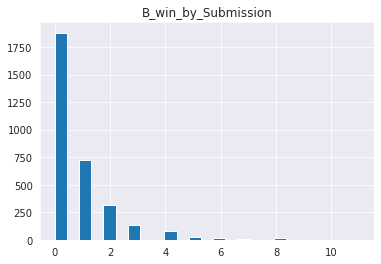

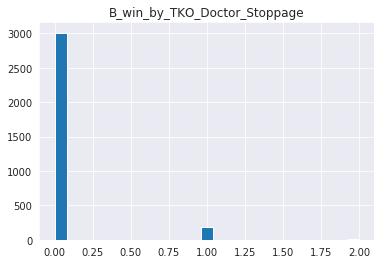

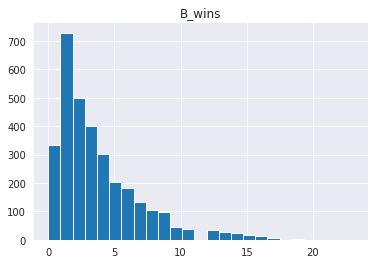

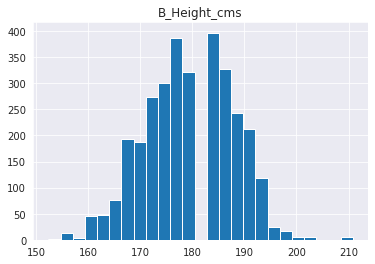

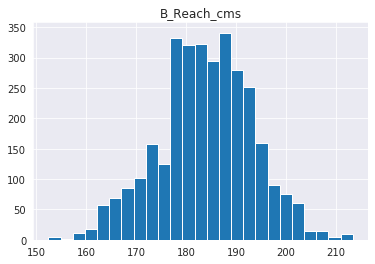

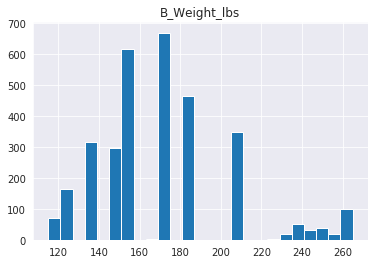

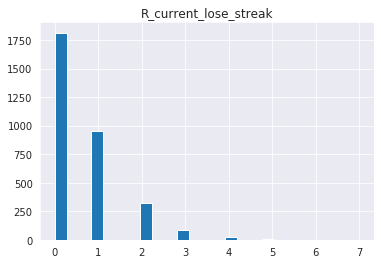

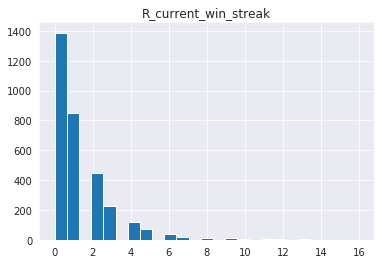

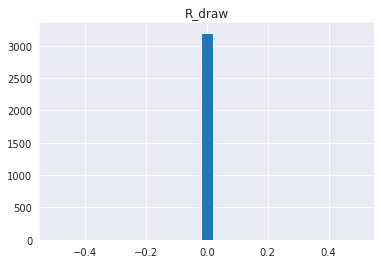

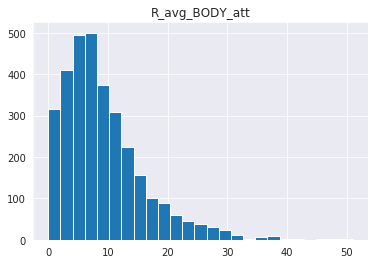

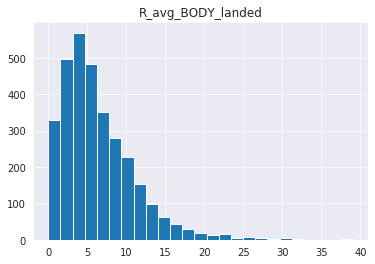

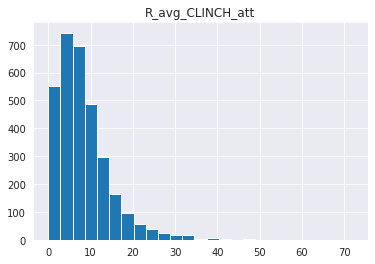

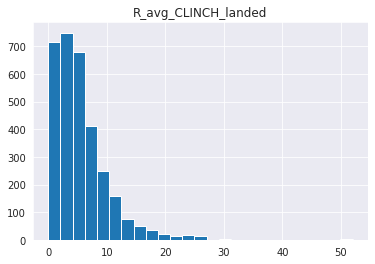

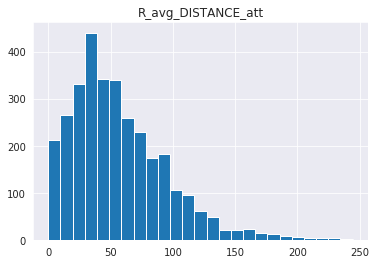

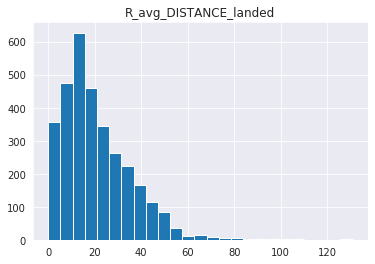

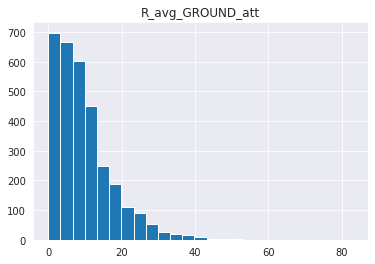

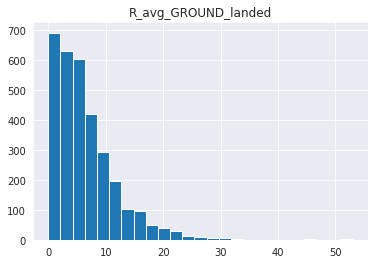

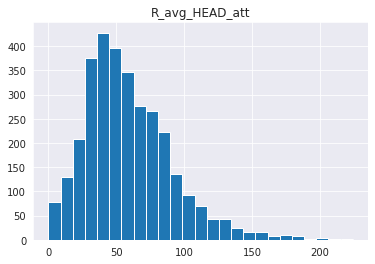

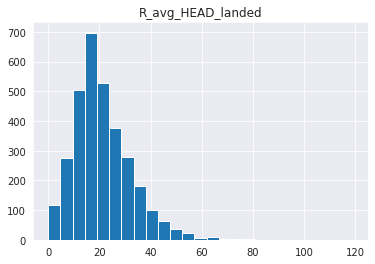

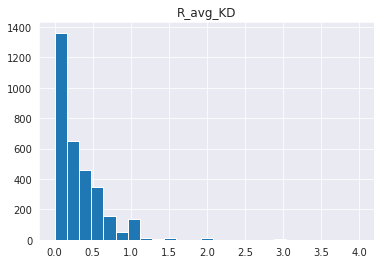

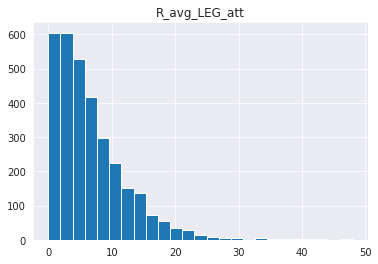

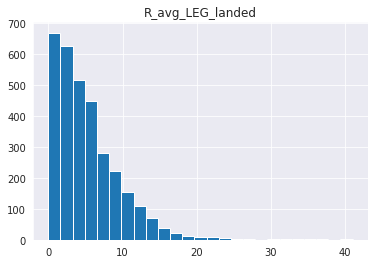

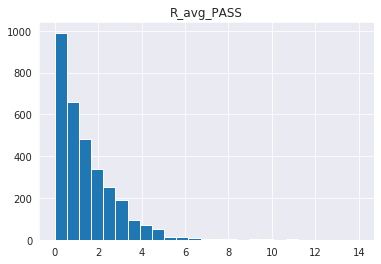

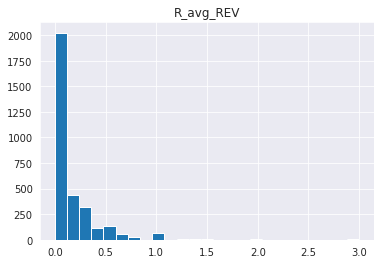

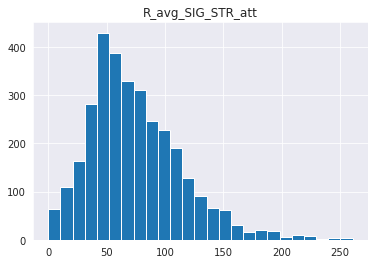

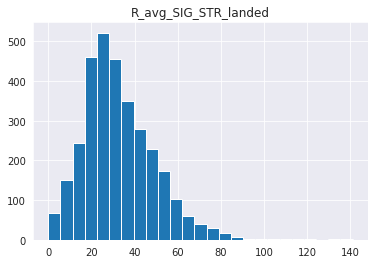

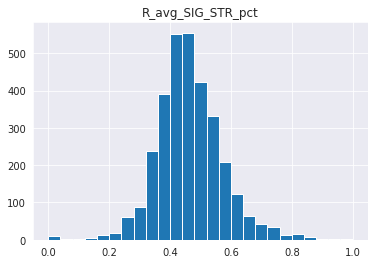

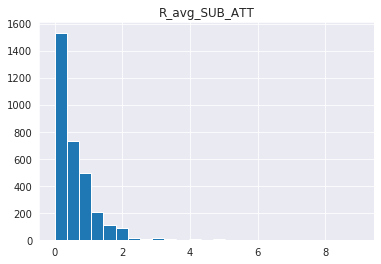

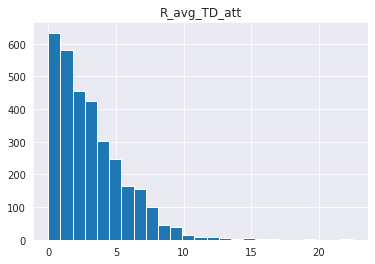

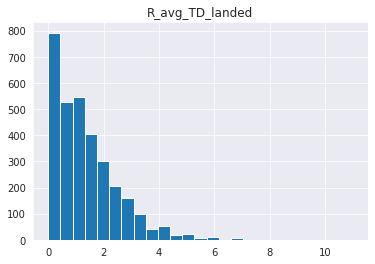

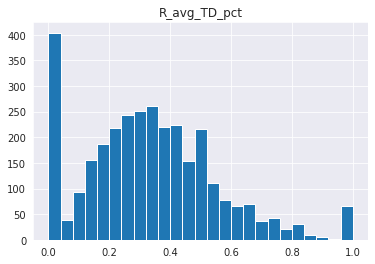

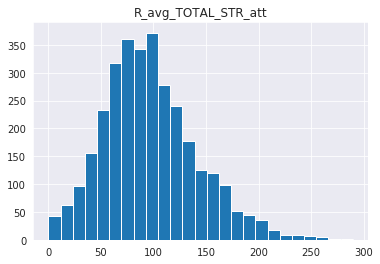

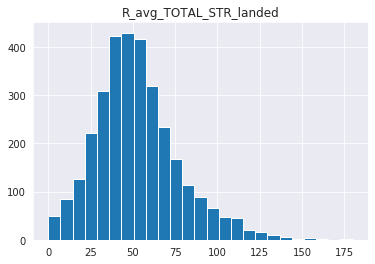

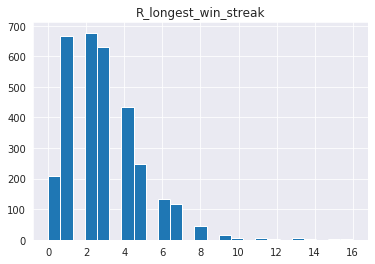

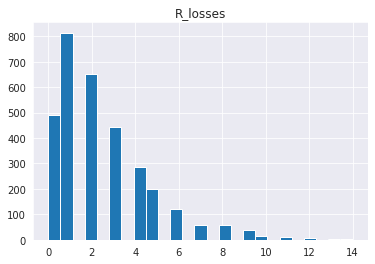

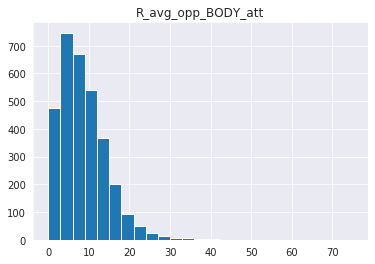

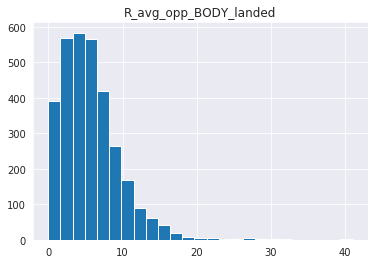

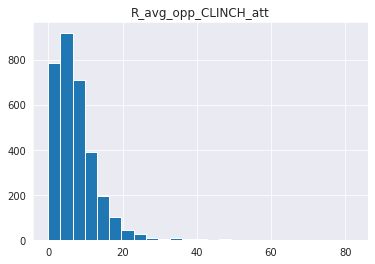

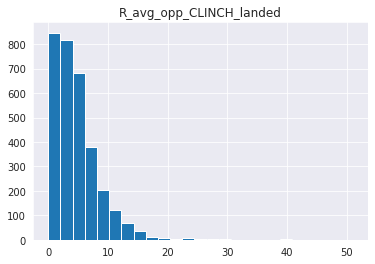

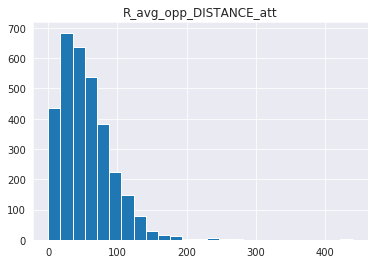

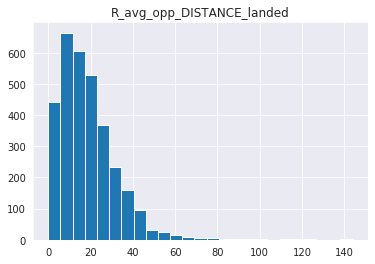

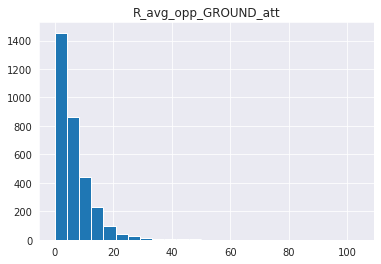

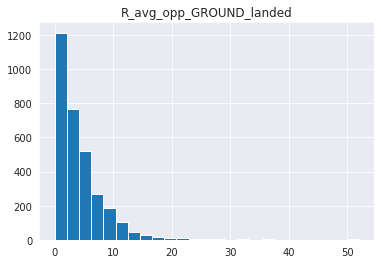

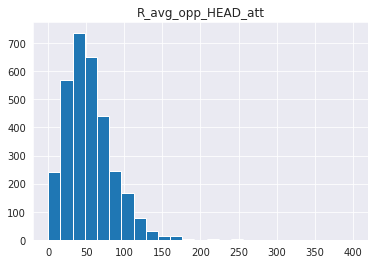

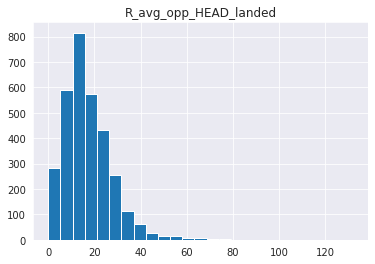

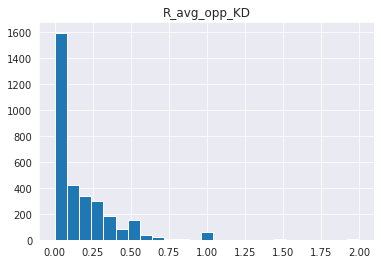

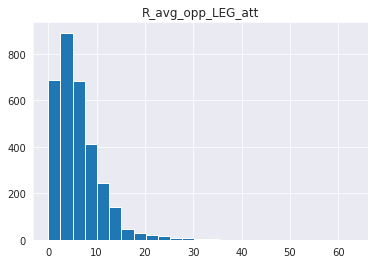

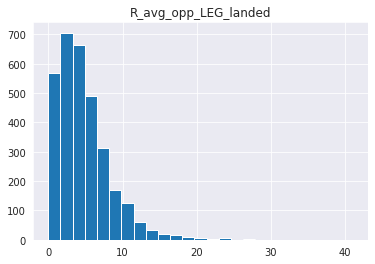

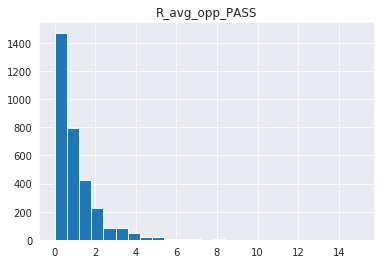

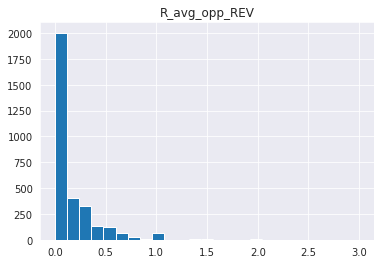

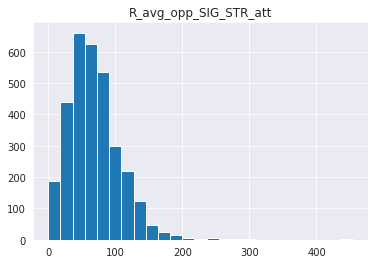

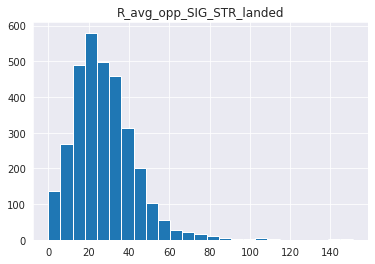

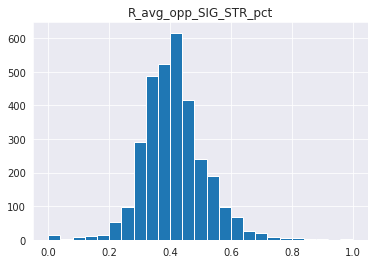

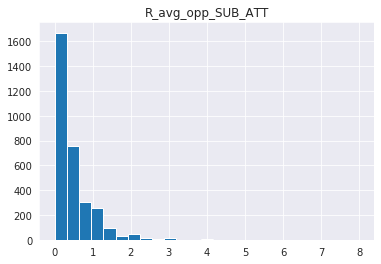

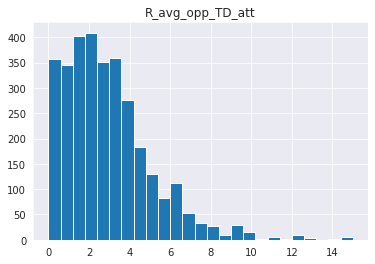

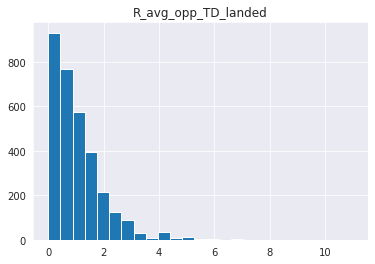

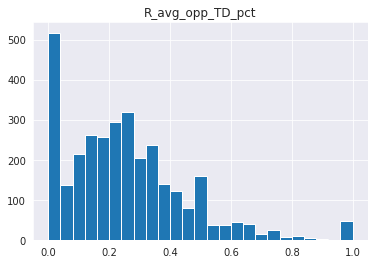

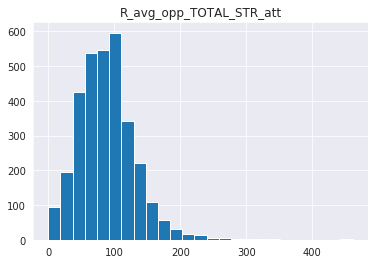

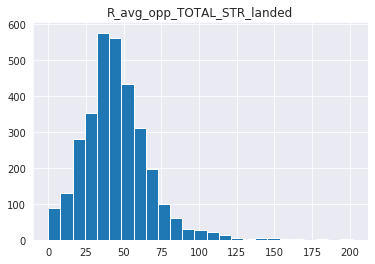

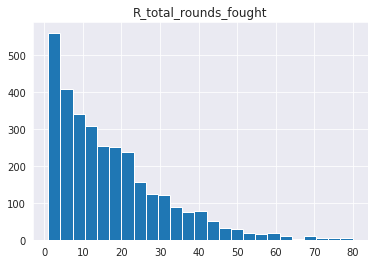

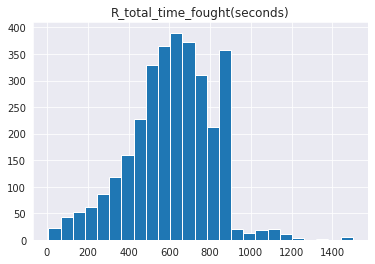

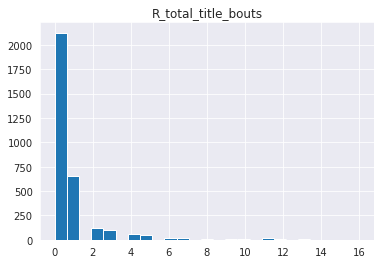

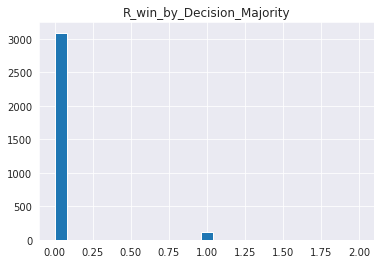

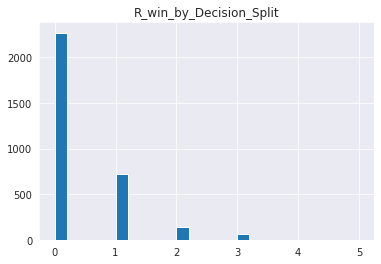

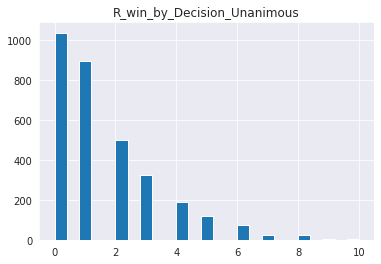

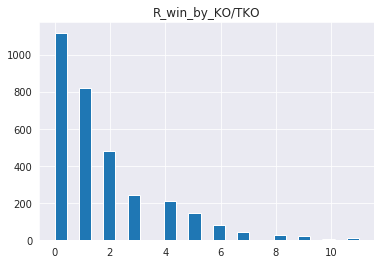

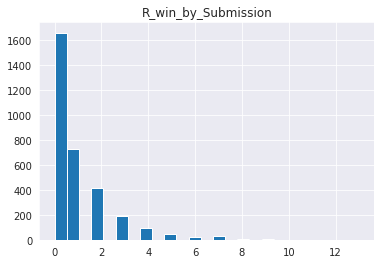

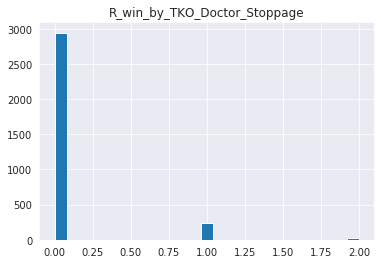

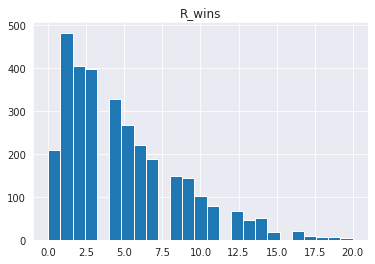

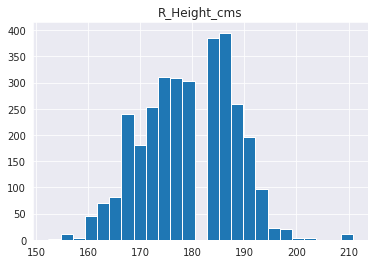

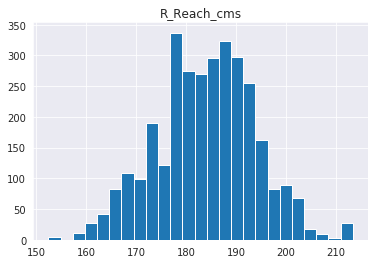

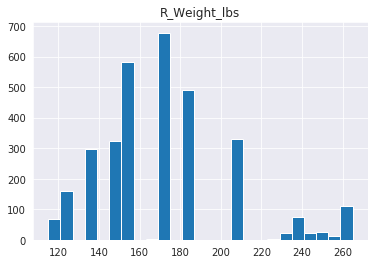

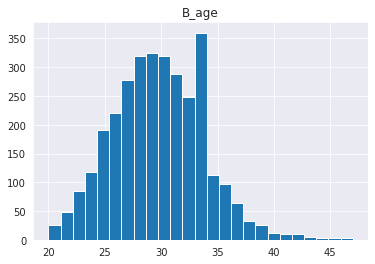

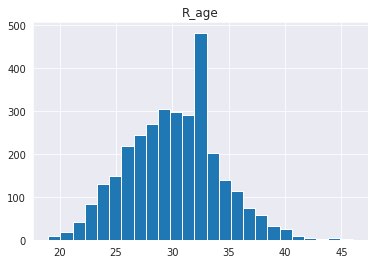

In [19]:
for col in cols:
    plt.title(col)
    plt.hist(df[col], bins = 25)
    plt.show()

In [20]:
df_blue.B_age.value_counts()

28.0    130
30.0    123
29.0    120
27.0    101
31.0     95
26.0     84
25.0     72
32.0     71
33.0     60
24.0     56
34.0     48
23.0     36
36.0     31
35.0     29
37.0     20
22.0     15
38.0     12
39.0      9
21.0      8
40.0      5
20.0      4
41.0      2
43.0      2
44.0      1
42.0      1
Name: B_age, dtype: int64

In [21]:
df_Red.R_age.value_counts()

30.0    193
29.0    190
31.0    181
27.0    178
28.0    174
32.0    167
26.0    150
33.0    125
25.0    109
34.0    104
24.0     93
35.0     83
23.0     62
36.0     61
22.0     33
37.0     33
38.0     20
39.0     16
21.0     15
40.0     11
20.0      5
41.0      5
44.0      2
46.0      2
45.0      1
19.0      1
42.0      1
43.0      1
Name: R_age, dtype: int64

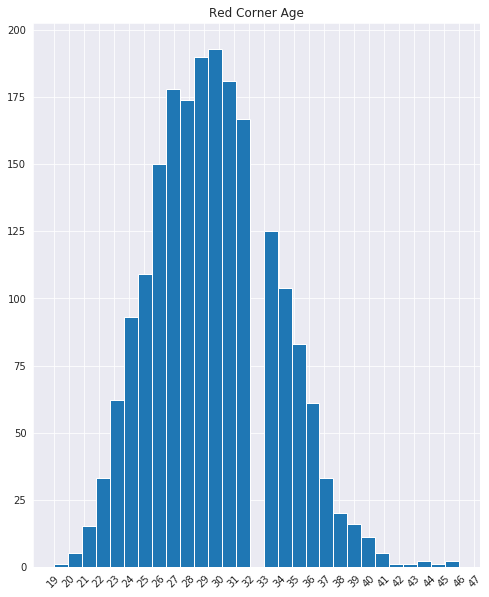

In [22]:
fig = plt.figure(figsize = (8,10))
plt.hist(df_Red.R_age, bins = 29)
plt.title("Red Corner Age")
plt.xticks(list(range(19,48)), rotation = 45)
plt.show()

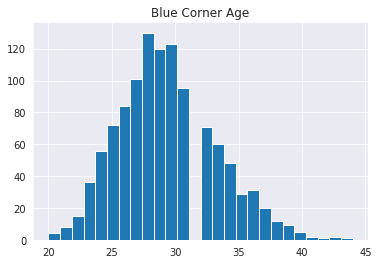

In [23]:
plt.hist(df_blue.B_age, bins = 26)
plt.title("Blue Corner Age")
plt.show()